<h1>COVID-19 in Spain and Madrid<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#OVERVIEW" data-toc-modified-id="OVERVIEW-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>OVERVIEW</a></span></li><li><span><a href="#SPAIN" data-toc-modified-id="SPAIN-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>SPAIN</a></span><ul class="toc-item"><li><span><a href="#Cases" data-toc-modified-id="Cases-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Cases</a></span><ul class="toc-item"><li><span><a href="#Daily-cases" data-toc-modified-id="Daily-cases-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Daily cases</a></span></li><li><span><a href="#Accumulated-daily-cases" data-toc-modified-id="Accumulated-daily-cases-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Accumulated daily cases</a></span></li><li><span><a href="#Variation-rate" data-toc-modified-id="Variation-rate-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Variation rate</a></span></li></ul></li><li><span><a href="#Deaths" data-toc-modified-id="Deaths-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Deaths</a></span><ul class="toc-item"><li><span><a href="#New-deaths" data-toc-modified-id="New-deaths-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>New deaths</a></span></li><li><span><a href="#Accumulated-daily-deaths" data-toc-modified-id="Accumulated-daily-deaths-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Accumulated daily deaths</a></span></li><li><span><a href="#Variation-rate" data-toc-modified-id="Variation-rate-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Variation rate</a></span></li></ul></li><li><span><a href="#Recovered" data-toc-modified-id="Recovered-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Recovered</a></span><ul class="toc-item"><li><span><a href="#New-recovered" data-toc-modified-id="New-recovered-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>New recovered</a></span></li><li><span><a href="#Accumulated-daily-recovered" data-toc-modified-id="Accumulated-daily-recovered-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Accumulated daily recovered</a></span></li><li><span><a href="#Variation-rate" data-toc-modified-id="Variation-rate-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Variation rate</a></span></li></ul></li></ul></li><li><span><a href="#MADRID" data-toc-modified-id="MADRID-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>MADRID</a></span><ul class="toc-item"><li><span><a href="#Cases" data-toc-modified-id="Cases-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Cases</a></span><ul class="toc-item"><li><span><a href="#Daily-cases" data-toc-modified-id="Daily-cases-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Daily cases</a></span></li><li><span><a href="#Accumulated-daily-cases" data-toc-modified-id="Accumulated-daily-cases-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Accumulated daily cases</a></span></li><li><span><a href="#Variation-rate" data-toc-modified-id="Variation-rate-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Variation rate</a></span></li></ul></li><li><span><a href="#Deaths" data-toc-modified-id="Deaths-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Deaths</a></span><ul class="toc-item"><li><span><a href="#New-deaths" data-toc-modified-id="New-deaths-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>New deaths</a></span></li><li><span><a href="#Accumulated-daily-deaths" data-toc-modified-id="Accumulated-daily-deaths-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Accumulated daily deaths</a></span></li><li><span><a href="#Variation-rate" data-toc-modified-id="Variation-rate-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Variation rate</a></span></li></ul></li></ul></li></ul></div>

-----

Created by [@ddzumajo](https://github.com/DiegoDZ). Automated data download by [@luismateos92](https://github.com/luismateos92).

------


# About the notebook

This notebook contains data representation of the following variables:

1. __Daily values__ of *confirmed cases* (*cases*), *deaths*, and *recovered*. 

2. __Accumulated values__ (grouped by day) of *cases*, *deaths*, and *recovered*.

3. The __variation rate__ of all variables from the previous points (daily cases, accumulated cases, and so on).


The variation rate is computed as follows

\begin{equation}\label{eq:}
V.R.(x_n) = \frac{x_n - x_{n-1}}{x_{n-1}} \cdot 100
\end{equation}

where *n* refers to the day in which the $V.R.$ is calculated.

Note that the $V.R.$ computed with accumulated data tends to zero in these two situations (for the sake of clarity I just mention to new *cases* but the idea may be extrapolated to the other variables: *deaths* and *recovered*): 

1. The number of new *cases* is constant over the days. 

2. The number of new *cases* decrases over the days. 

This appreciation is important to avoid wrong conclusions about the $V.R.$ curves computed with accumulated data of *cases* and *deaths*. Only when the curve is exactly zero we can conclude that the situation is "under control" (*i.e.* there is no new *cases* or *deaths*). Also we can say that the situation is better than previous days if the slope of the ajusted curve of the last days is getting larger (and negative, obviously). This indicates a daily reduction in the number of new *cases* or *deaths*. 

# Data

Data from www.epdata.es, Ministerio de Sanidad, Consumo y Bienestar Social (Spanish government). 

When this notebook was finalized there was no data about the recovered cases in Madrid.

Data is automatically extracted from the official source when the user runs the notebook. After the processing stage, data with the calculated metrics is saved in the directory *data_output*.

In [1]:
# Libraries and figure settings

import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import time
import matplotlib
plt.style.use('fivethirtyeight')

In [2]:
# Download data

headers = {
    'authority': 'www.epdata.es',
    'pragma': 'no-cache',
    'cache-control': 'no-cache',
    'content-type': 'application/json; charset=UTF-8',
    'origin': 'https://www.epdata.es',
    'sec-fetch-site': 'same-origin',
    'accept-language': 'es-ES,es;q=0.9,en;q=0.8,zh-CN;q=0.7,zh;q=0.6',
}
data_cases_spain = '{"Host":"www.epdata.es","Guid":"476812f9-73a2-4b5f-a74c-4824bc8b4a17","Formato":"json"}'
data_deaths_accum_spain = '{"Host":"www.epdata.es","Guid":"b2568be9-c6b6-4056-86d6-02c6d45b1696","Formato":"json"}'
data_recovered_accum_spain = '{"Host":"www.epdata.es","Guid":"58d0919c-8ad1-4a3f-9255-55f5b116da23","Formato":"json"}'
data_cases_madrid = '{"Host":"www.epdata.es","Guid":"ebb8e9f0-2c01-4090-bc03-569a348f45dc-304","Formato":"json"}'
data_deaths_madrid = '{"Host":"www.epdata.es","Guid":"81d9b17a-6b10-40de-a592-981cc548c6f2","Formato":"json"}'

response_cases_spain = requests.post('https://www.epdata.es/oembed/get/', headers = headers, data = data_cases_spain).json()
response_deaths_accum_spain = requests.post('https://www.epdata.es/oembed/get/', headers = headers, data = data_deaths_accum_spain).json()
response_recovered_accum_spain = requests.post('https://www.epdata.es/oembed/get/', headers = headers, data = data_recovered_accum_spain).json()

response_cases_madrid = requests.post('https://www.epdata.es/oembed/get/', headers = headers, data = data_cases_madrid).json()
response_deaths_madrid = requests.post('https://www.epdata.es/oembed/get/', headers = headers, data = data_deaths_madrid).json()


# Create raw dataframe

raw_cases_spain = pd.read_json(response_cases_spain)
raw_deaths_accum_spain = pd.read_json(response_deaths_accum_spain)
raw_recovered_accum_spain = pd.read_json(response_recovered_accum_spain)

raw_cases_madrid = pd.read_json(response_cases_madrid)
raw_deaths_madrid = pd.read_json(response_deaths_madrid)

In [3]:
# Dictionaries and constants

day_init_quarantine = 44
day14_init_quarantine = 59
day14_strict_quarantine = 73
first_day_to_plot = 33
last_day_to_plot = 80
dict_months = {'Enero':1, 'Febrero':2, 'Marzo':3, 'Abril':4, 'Mayo':5, 'Junio':6, 'Julio':7, 'Agosto':8, 'Septiembre':9, 'Octubre':10, 'Noviembre':11, 'Diciembre':12}

In [4]:
# Functions

def createDataframeFromJson(raw_data):
    number_days_monitored = len(raw_data['Respuesta'][0]['Metricas'][0]['Datos'])
    list_cases_dates = []
    for day in range(number_days_monitored):
        date = raw_data['Respuesta'][0]['Metricas'][0]['Datos'][day]['Parametro']
        cases = raw_data['Respuesta'][0]['Metricas'][0]['Datos'][day]['Valor']
        list_cases_dates.append([date, cases])     
    df0 = pd.DataFrame(list_cases_dates, columns = ['Date' , 'Cases'])
    df0[['Day', 'Month']] = df0['Date'].str.extract(r'([\d]+) \((.*?)\)')
    df0.replace({'Month': dict_months}, inplace= True)
    df0['Period'] = '2020' + '/' + df0['Month'].astype(str) + '/' + df0['Day'].astype(str)
    df0['Period'] = df0['Period'].apply(lambda x: datetime.strptime(x, '%Y/%m/%d'))
    df0.drop(['Date', 'Day', 'Month'], axis=1, inplace = True)
    df0.sort_values(by=['Period'], inplace = True)
    df0['Day'] = range(number_days_monitored)
    return df0

def fromAccumToSingleValues(x):
    y = np.zeros(len(x))
    for i in np.arange(len(x)-1,0,-1):
        y[i] = x[i] - x[i-1]
    return y

def createOverviewPlot(subplotIndex,yCases,yDeaths,yRecovered,title,yScale):
    plt.subplot(subplotIndex)
    plt.plot(df_global['Day'], df_global[yCases], color = 'r', marker='o', linestyle='solid', linewidth=2, markersize=5, label='Cases')
    plt.plot(df_global['Day'], df_global[yDeaths], color = 'k', marker='o', linestyle='solid', linewidth=2, markersize=5, label='Deaths')
    if yRecovered != 'null':
        plt.plot(df_global['Day'], df_global[yRecovered], color = 'g', marker='o', linestyle='solid', linewidth=2, markersize=5, label='Recovered')
    plt.title(title, fontsize = 20)
    plt.xlabel('Day', fontsize=15)
    plt.yscale(yScale)
    plt.axvline(day_init_quarantine, 0, 1, color = 'g', alpha = .5, linewidth=2, linestyle = 'dashed',label = 'Day 0 "soft" quarantine')
    plt.axvline(day14_init_quarantine, 0, 1, color = 'r', alpha = .5, linewidth=2, linestyle = 'dashed',label = 'Day 0 "strict" quarantine')
    plt.axvspan(day_init_quarantine, day14_init_quarantine, facecolor='g', alpha=0.15)
    plt.axvspan(day14_init_quarantine, day14_strict_quarantine, facecolor='r', alpha=0.15)
    plt.xlim(first_day_to_plot,last_day_to_plot)
    plt.legend(fontsize=12)

def createSinglePlot(xData, yData, labelData, title, yLabel, yScale): 
        plt.figure(figsize=(20,10))
        plt.plot(df_global[xData], df_global[yData], color = 'navy', marker='o', linestyle='dashed',
        linewidth=2, markersize=12, label=labelData)
        plt.axvline(day_init_quarantine, 0, 1, color = 'g', alpha = .5, label = 'Day 0 "soft" quarantine')
        plt.axvline(day14_init_quarantine, 0, 1, color = 'r', alpha = .5, label = 'Day 0 "strict" quarantine')
        plt.axvspan(day_init_quarantine, day14_init_quarantine, facecolor='g', alpha=0.15)
        plt.axvspan(day14_init_quarantine, day14_strict_quarantine, facecolor='r', alpha=0.15)
        plt.xlim(first_day_to_plot,last_day_to_plot)
        plt.title(title, fontsize = 24)
        plt.xlabel('Day', fontsize=20)
        plt.ylabel(yLabel, fontsize=20)
        plt.legend(fontsize=15)
        plt.yscale(yScale)
        return plt.show()

In [5]:
# Create dataframe Spain

df_cases_spain = createDataframeFromJson(raw_cases_spain)
df_cases_spain.rename(columns={'Cases': 'Cases_Spain'}, inplace= True)
df_deaths_accum_spain = createDataframeFromJson(raw_deaths_accum_spain)
df_deaths_accum_spain.rename(columns={'Cases': 'DeathsAccum_Spain'}, inplace= True)
df_recovered_accum_spain = createDataframeFromJson(raw_recovered_accum_spain)
df_recovered_accum_spain.rename(columns={'Cases': 'RecoveredAccum_Spain'}, inplace= True)

df_spain0 = pd.merge(df_cases_spain[['Period', 'Day','Cases_Spain']],
                 df_deaths_accum_spain[['Period', 'DeathsAccum_Spain']],
                 on='Period', 
                 how='left')
df_spain = pd.merge(df_spain0[['Period', 'Day','Cases_Spain','DeathsAccum_Spain']],
                 df_recovered_accum_spain[['Period', 'RecoveredAccum_Spain']],
                 on='Period', 
                 how='left')


# Create dataframe Madrid

df_cases_madrid = createDataframeFromJson(raw_cases_madrid)
df_cases_madrid.rename(columns={'Cases': 'Cases_Madrid'}, inplace= True)
df_deaths_madrid = createDataframeFromJson(raw_deaths_madrid)
df_deaths_madrid.rename(columns={'Cases': 'Deaths_Madrid'}, inplace= True)

df_madrid = pd.merge(df_cases_madrid[['Period', 'Day','Cases_Madrid']],
                 df_deaths_madrid[['Period', 'Deaths_Madrid']],
                 on='Period', 
                 how='left')

# Create dataframe global

df_global = pd.merge(df_spain[['Period', 'Day','Cases_Spain','DeathsAccum_Spain', 'RecoveredAccum_Spain']], 
                    df_madrid[['Period', 'Cases_Madrid', 'Deaths_Madrid']],
                    on = 'Period',
                    how = 'left')

In [6]:
# Compute missing fields and metrics

# Deaths and recovered in Spain from accumulative data
df_global['Deaths_Spain'] = fromAccumToSingleValues(df_global['DeathsAccum_Spain'].values)
df_global['Recovered_Spain'] = fromAccumToSingleValues(df_global['RecoveredAccum_Spain'].values)

# Cumulative sum Madrid
df_global['CasesAccum_Madrid'] = df_global['Cases_Madrid'].cumsum()
df_global['DeathsAccum_Madrid'] = df_global['Deaths_Madrid'].cumsum()

# Variation rates Madrid
df_global['Cases_VariationRate_Madrid'] = df_global['Cases_Madrid'].pct_change() * 100
df_global['Deaths_VariationRate_Madrid'] = df_global['Deaths_Madrid'].pct_change() * 100
df_global['CasesAccum_VariationRate_Madrid'] = df_global['CasesAccum_Madrid'].pct_change() * 100
df_global['DeathsAccum_VariationRate_Madrid'] = df_global['DeathsAccum_Madrid'].pct_change() * 100

# Cumulative sum Spain
df_global['CasesAccum_Spain'] = df_global['Cases_Spain'].cumsum()

# Variation rates Spain
df_global['Cases_VariationRate_Spain'] = df_global['Deaths_Spain'].pct_change() * 100
df_global['CasesAccum_VariationRate_Spain'] = df_global['CasesAccum_Spain'].pct_change() * 100
df_global['Deaths_VariationRate_Spain'] = df_global['Deaths_Spain'].pct_change() * 100
df_global['DeathsAccum_VariationRate_Spain'] = df_global['DeathsAccum_Spain'].pct_change() * 100
df_global['Recovered_VariationRate_Spain'] = df_global['Recovered_Spain'].pct_change() * 100
df_global['RecoveredAccum_VariationRate_Spain'] = df_global['RecoveredAccum_Spain'].pct_change() * 100

In [7]:
# Save dataframe for future use

TodaysDate = time.strftime("%d-%m-%Y")
csvfilename = 'data_' + TodaysDate + '.csv'
path=r'./data_output/'
df_global.to_csv(path+csvfilename, index = False)

In [8]:
# Select only the days after the first 50 deaths in Spain

mask = (df_global['Day'] > first_day_to_plot)
df_global = df_global.loc[mask]

In [9]:
df_global.head()

,Period,Day,Cases_Spain,DeathsAccum_Spain,RecoveredAccum_Spain,Cases_Madrid,Deaths_Madrid,Deaths_Spain,Recovered_Spain,CasesAccum_Madrid,...,Deaths_VariationRate_Madrid,CasesAccum_VariationRate_Madrid,DeathsAccum_VariationRate_Madrid,CasesAccum_Spain,Cases_VariationRate_Spain,CasesAccum_VariationRate_Spain,Deaths_VariationRate_Spain,DeathsAccum_VariationRate_Spain,Recovered_VariationRate_Spain,RecoveredAccum_VariationRate_Spain
34,2020-03-05,34,39.0,3.0,10.0,20.0,NaN,2.0,7.0,41.0,...,NaN,95.238095,NaN,237.0,inf,19.696970,inf,200.000000,inf,233.333333
35,2020-03-06,35,128.0,5.0,10.0,47.0,NaN,2.0,0.0,88.0,...,NaN,114.634146,NaN,365.0,0.000000,54.008439,0.000000,66.666667,-100.0,0.000000
36,2020-03-07,36,65.0,8.0,30.0,37.0,NaN,3.0,20.0,125.0,...,NaN,42.045455,NaN,430.0,50.000000,17.808219,50.000000,60.000000,inf,200.000000
37,2020-03-08,37,159.0,17.0,30.0,28.0,NaN,9.0,0.0,153.0,...,NaN,22.400000,NaN,589.0,200.000000,36.976744,200.000000,112.500000,-100.0,0.000000
38,2020-03-09,38,410.0,29.0,30.0,375.0,NaN,12.0,0.0,528.0,...,NaN,245.098039,NaN,999.0,33.333333,69.609508,33.333333,70.588235,NaN,0.000000


## OVERVIEW

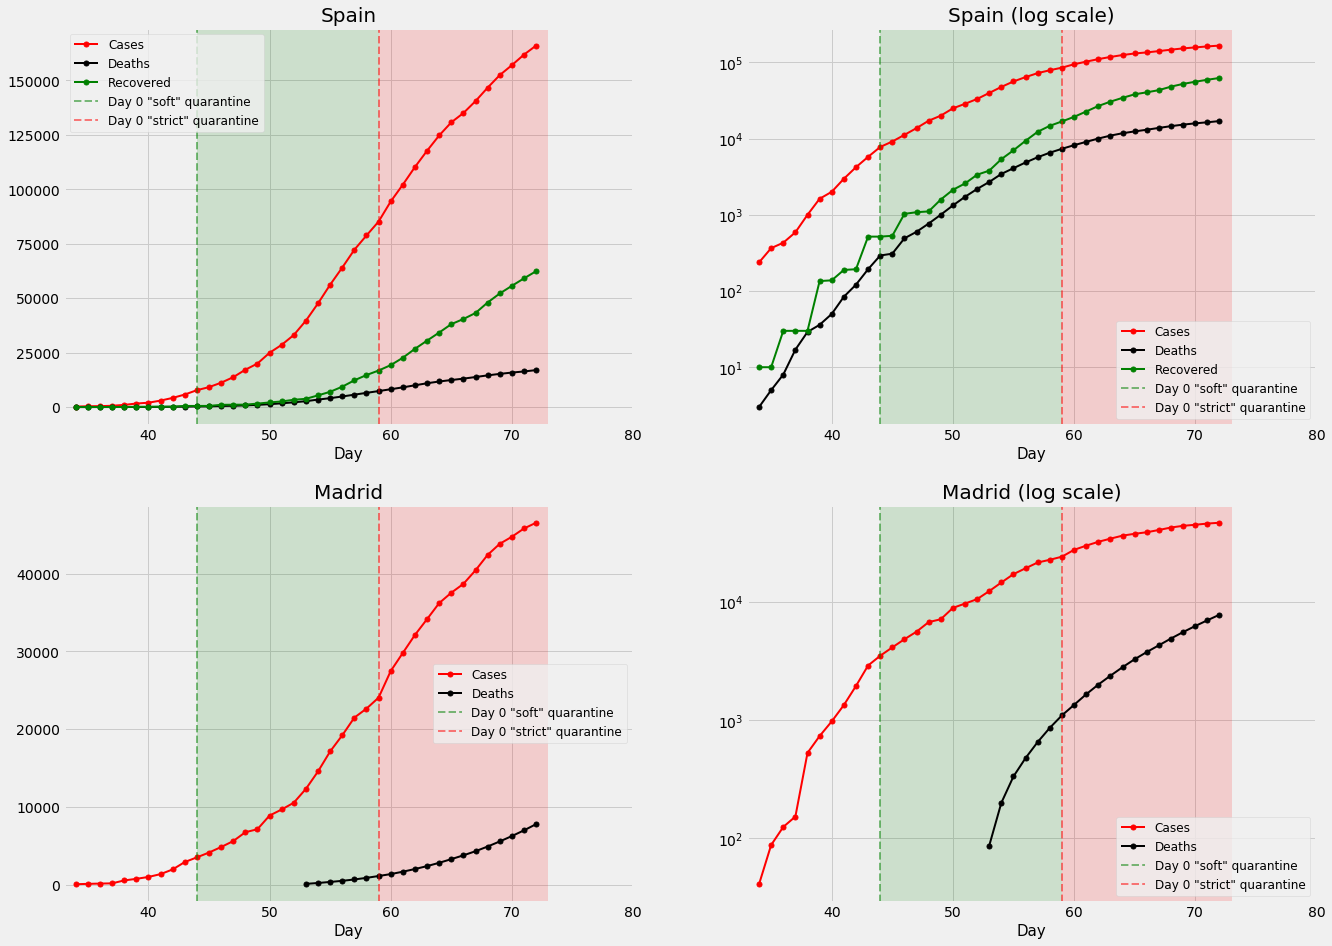

In [10]:
plt.figure(figsize=(20,15))
createOverviewPlot(221,'CasesAccum_Spain','DeathsAccum_Spain','RecoveredAccum_Spain','Spain','linear')
createOverviewPlot(222,'CasesAccum_Spain','DeathsAccum_Spain','RecoveredAccum_Spain','Spain (log scale)','log')
createOverviewPlot(223,'CasesAccum_Madrid','DeathsAccum_Madrid','null','Madrid','linear')
createOverviewPlot(224,'CasesAccum_Madrid','DeathsAccum_Madrid','null','Madrid (log scale)','log')

## SPAIN

### Cases

#### Daily cases

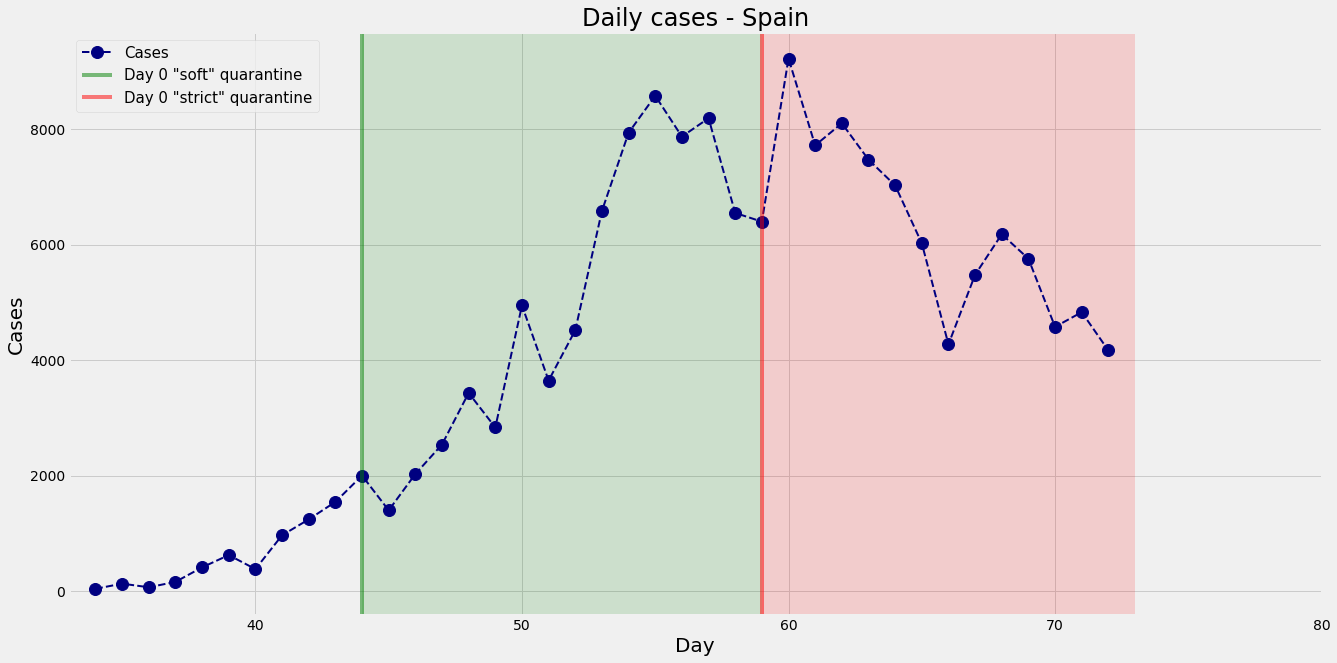

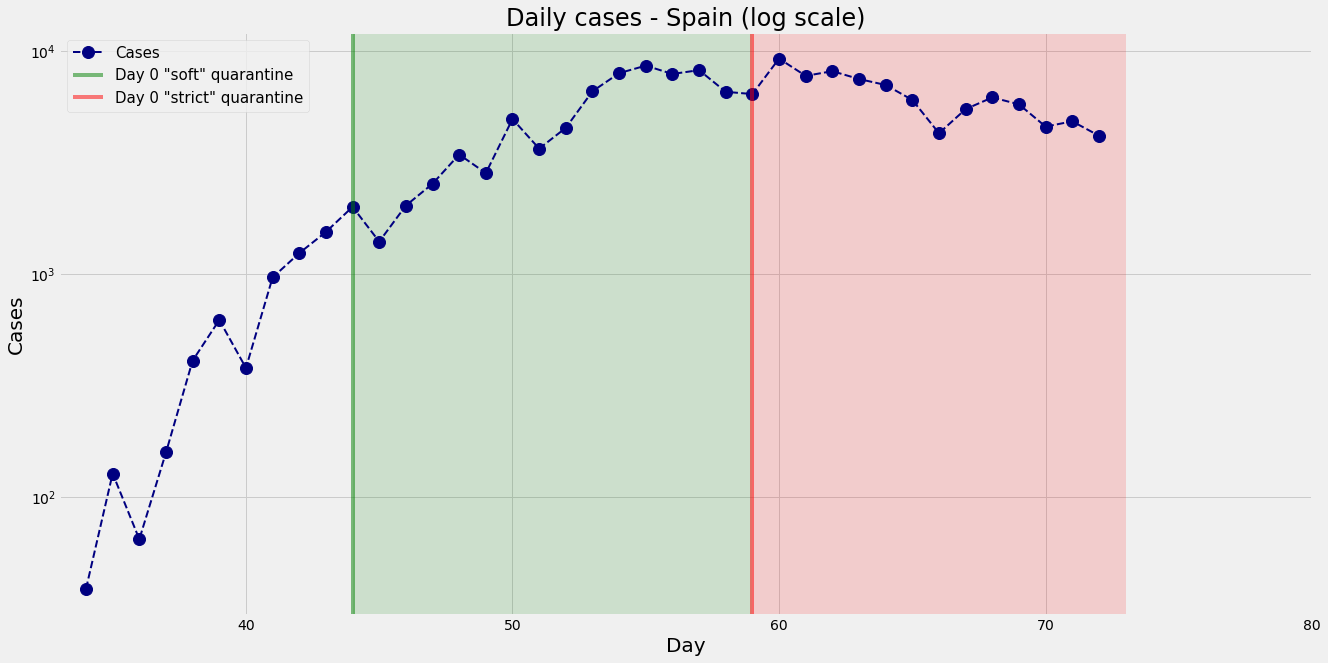

In [11]:
createSinglePlot('Day', 'Cases_Spain','Cases','Daily cases - Spain', 'Cases','linear')
createSinglePlot('Day', 'Cases_Spain','Cases','Daily cases - Spain (log scale)', 'Cases','log')

#### Accumulated daily cases

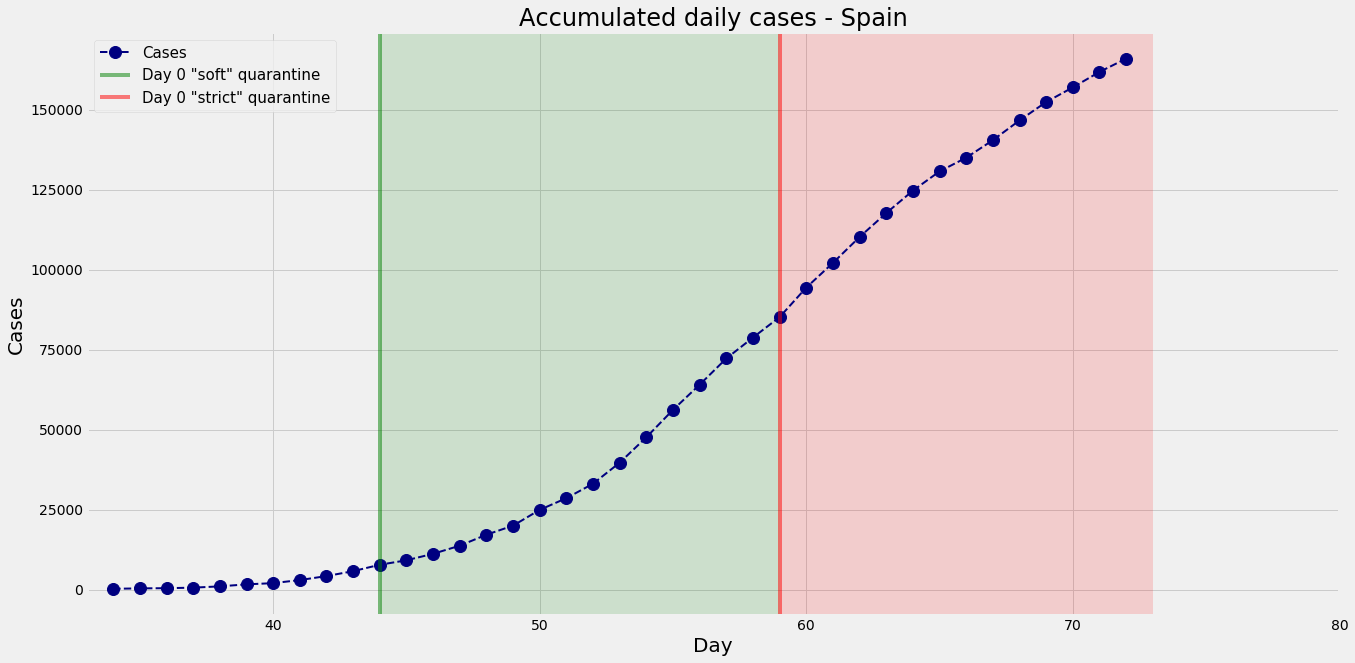

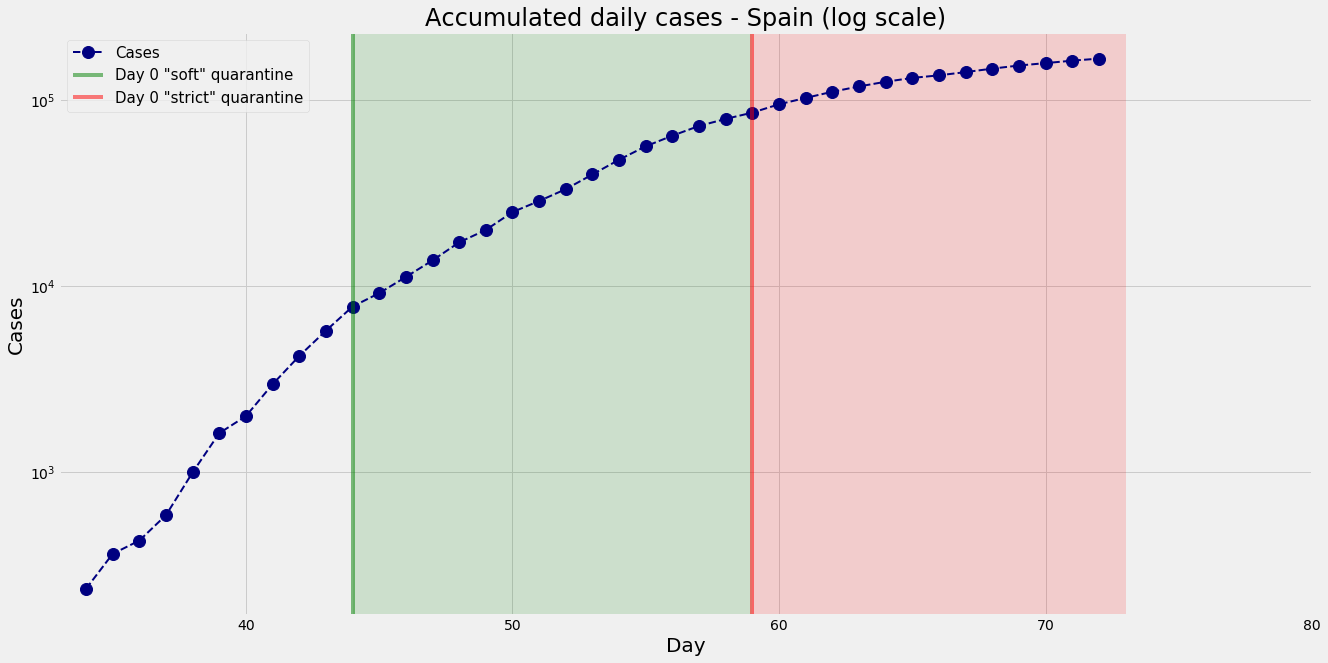

In [12]:
createSinglePlot('Day', 'CasesAccum_Spain','Cases','Accumulated daily cases - Spain', 'Cases','linear')
createSinglePlot('Day', 'CasesAccum_Spain','Cases','Accumulated daily cases - Spain (log scale)', 'Cases','log')

#### Variation rate

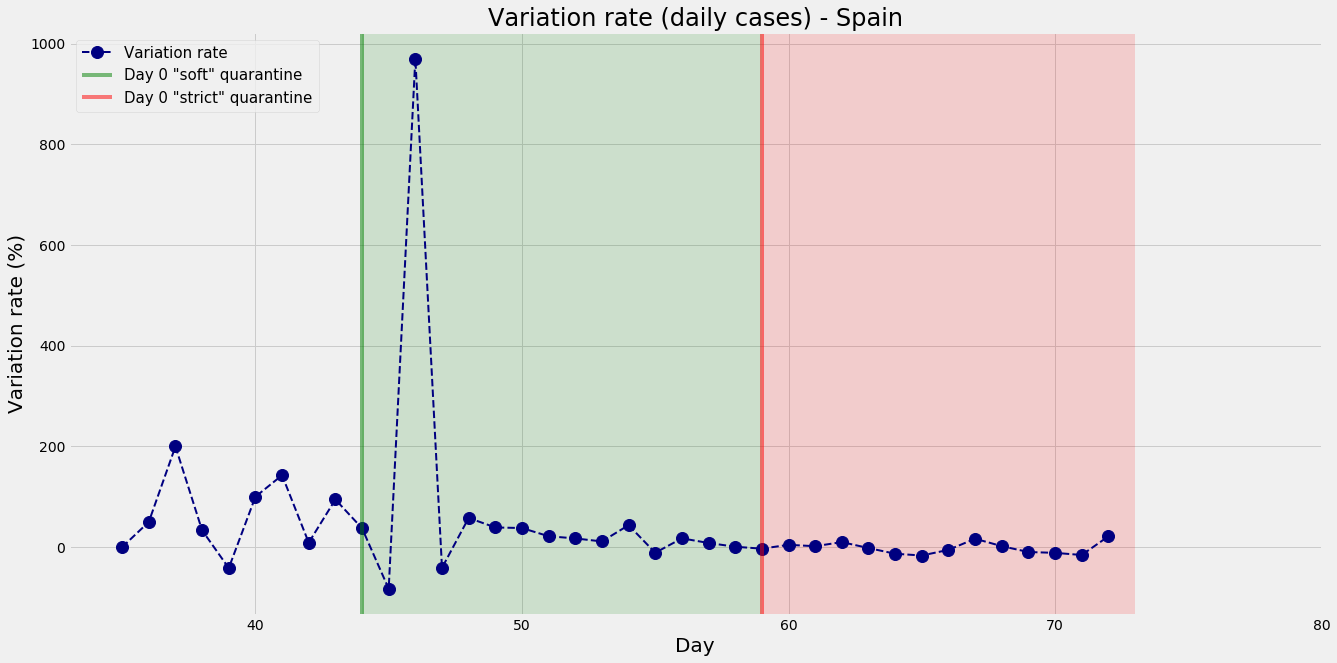

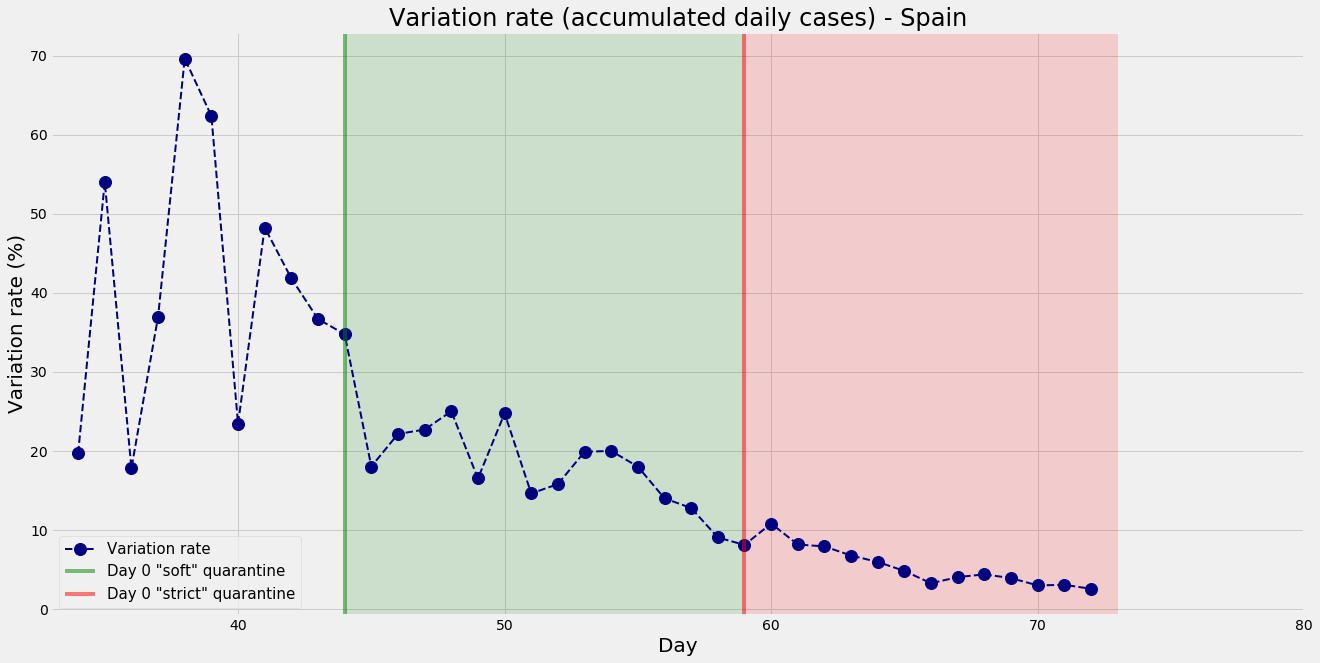

In [13]:
createSinglePlot('Day', 'Cases_VariationRate_Spain','Variation rate','Variation rate (daily cases) - Spain', 'Variation rate (%)','linear')
createSinglePlot('Day', 'CasesAccum_VariationRate_Spain','Variation rate','Variation rate (accumulated daily cases) - Spain', 'Variation rate (%)','linear')

### Deaths

#### New deaths

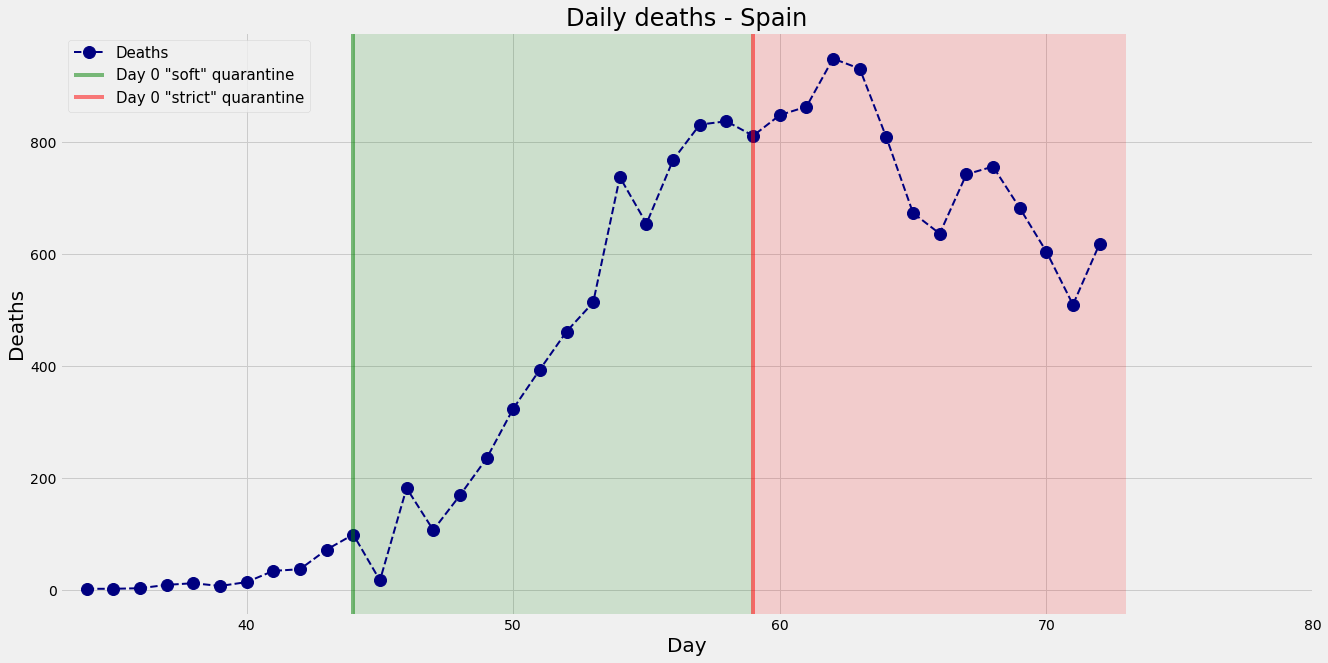

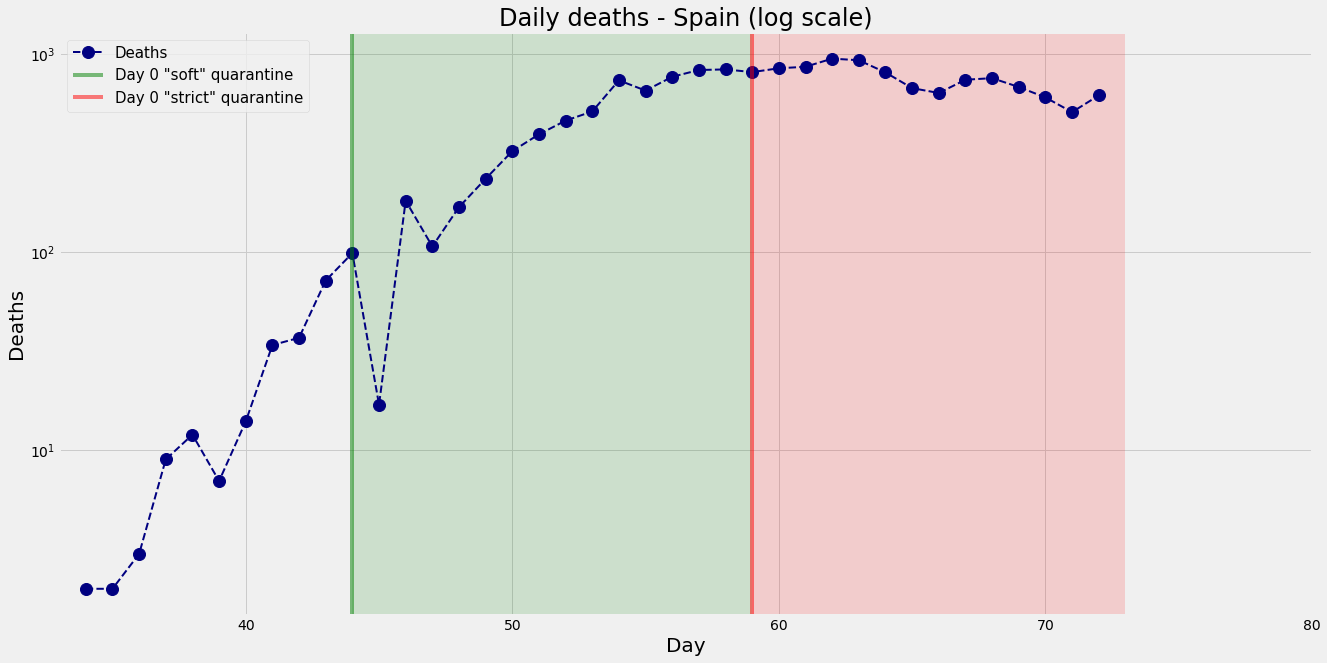

In [14]:
createSinglePlot('Day', 'Deaths_Spain','Deaths','Daily deaths - Spain', 'Deaths','linear')
createSinglePlot('Day', 'Deaths_Spain','Deaths','Daily deaths - Spain (log scale)', 'Deaths','log')

#### Accumulated daily deaths

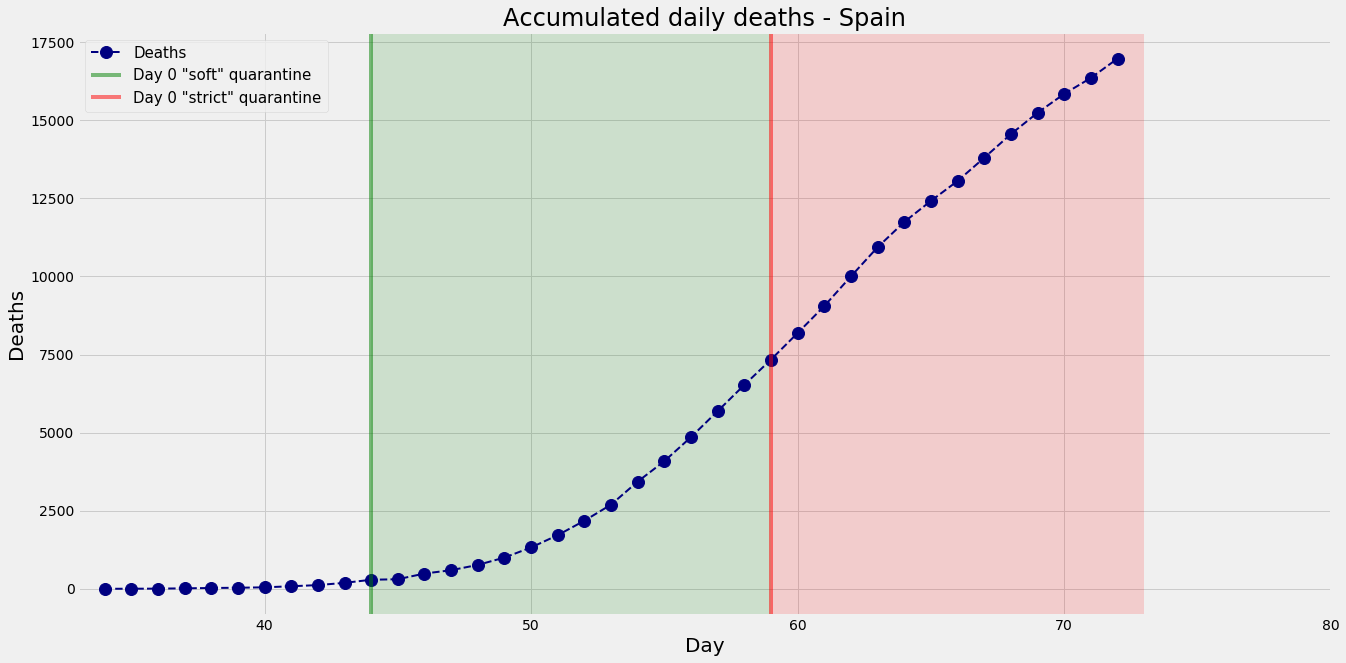

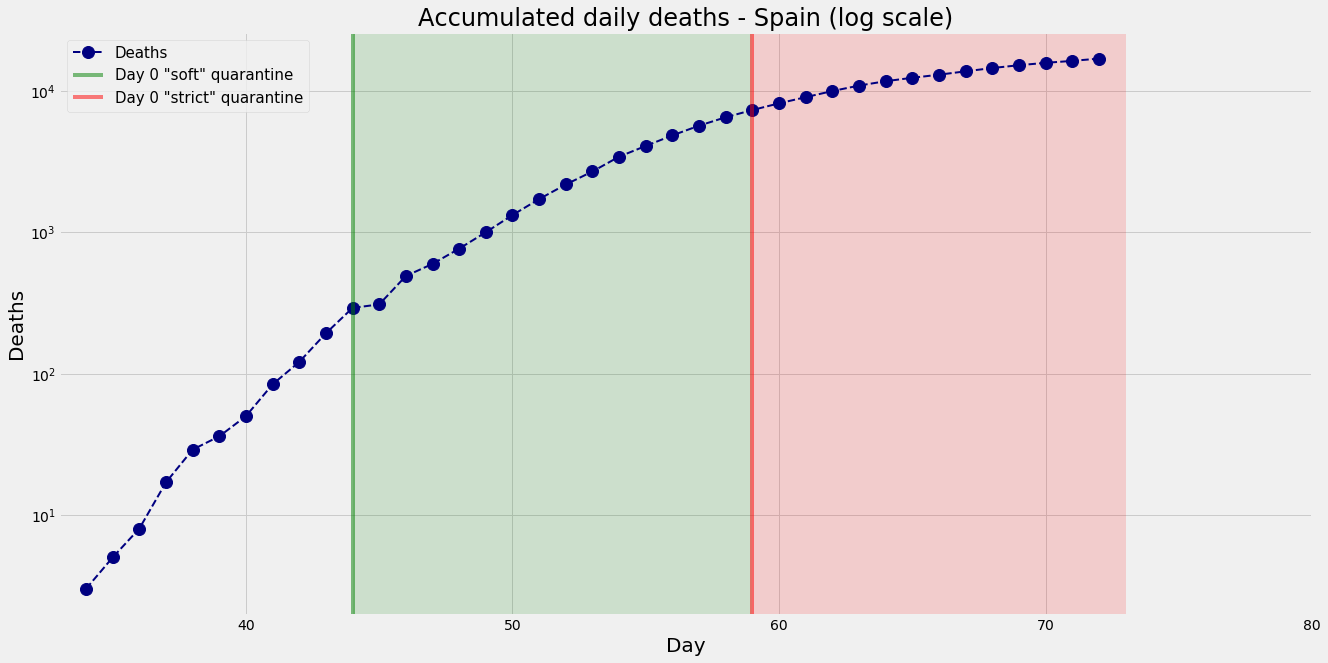

In [15]:
createSinglePlot('Day', 'DeathsAccum_Spain','Deaths','Accumulated daily deaths - Spain', 'Deaths','linear')
createSinglePlot('Day', 'DeathsAccum_Spain','Deaths','Accumulated daily deaths - Spain (log scale)', 'Deaths','log')

#### Variation rate

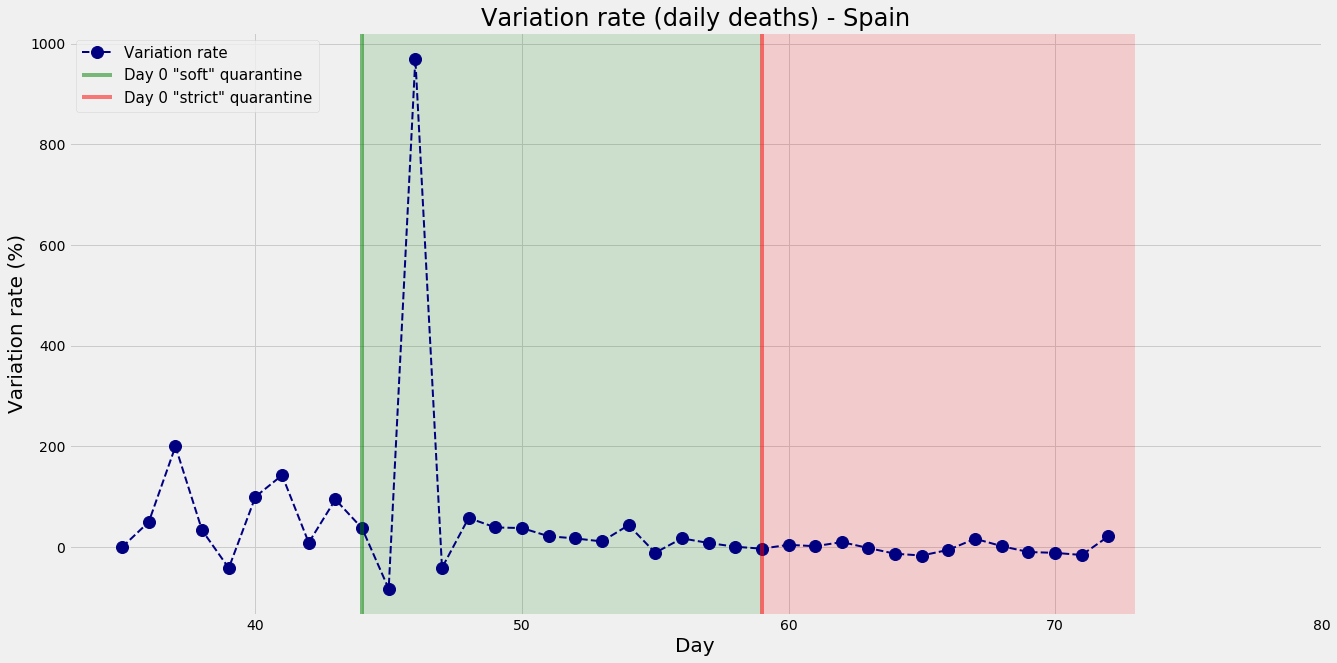

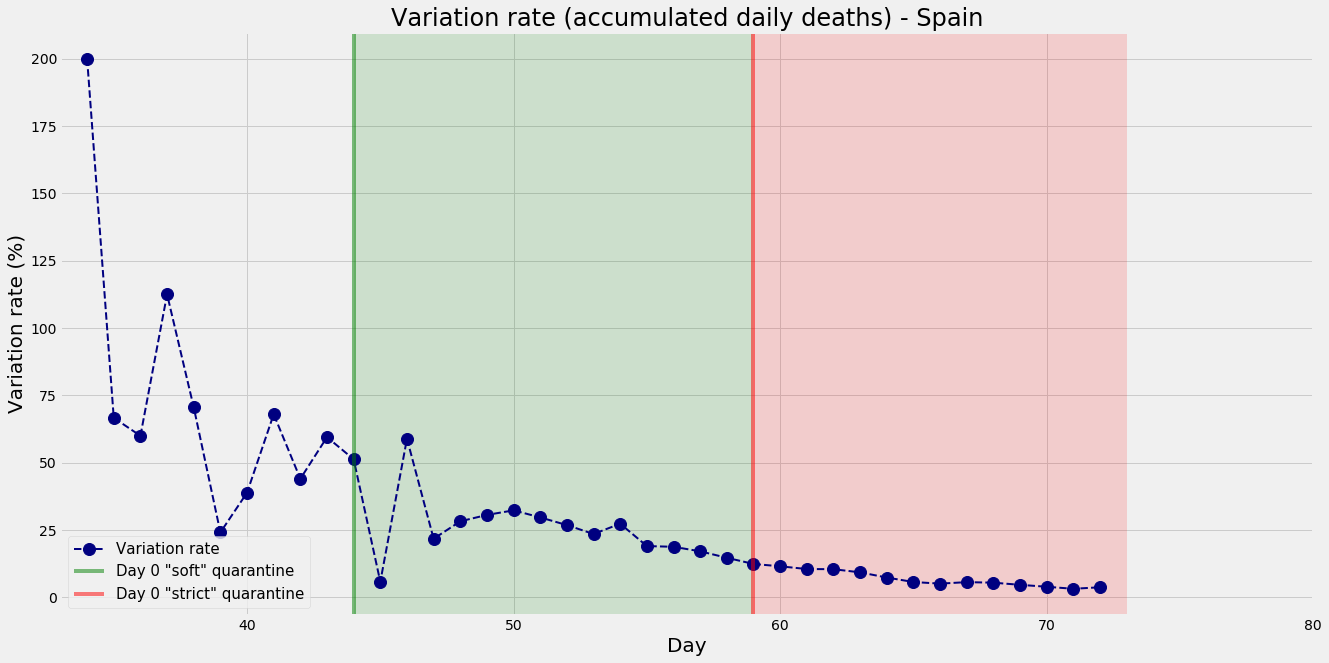

In [16]:
createSinglePlot('Day', 'Deaths_VariationRate_Spain','Variation rate','Variation rate (daily deaths) - Spain', 'Variation rate (%)','linear')
createSinglePlot('Day', 'DeathsAccum_VariationRate_Spain','Variation rate','Variation rate (accumulated daily deaths) - Spain', 'Variation rate (%)','linear')

### Recovered

#### New recovered

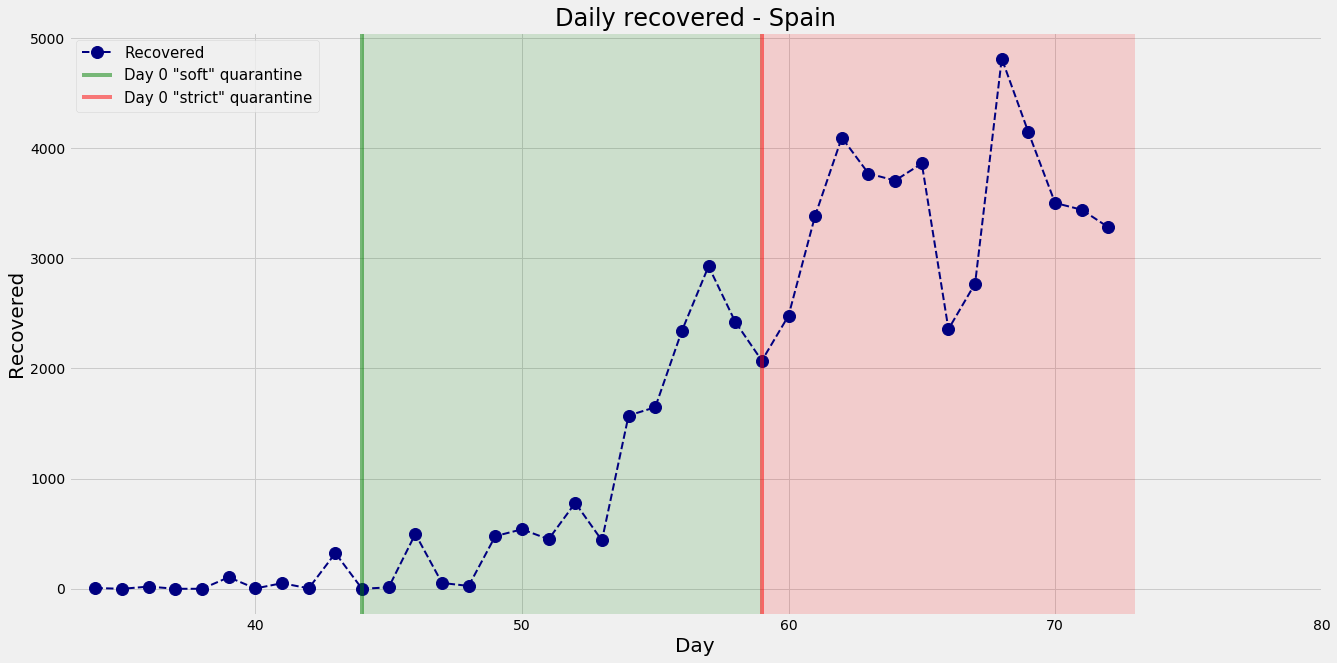

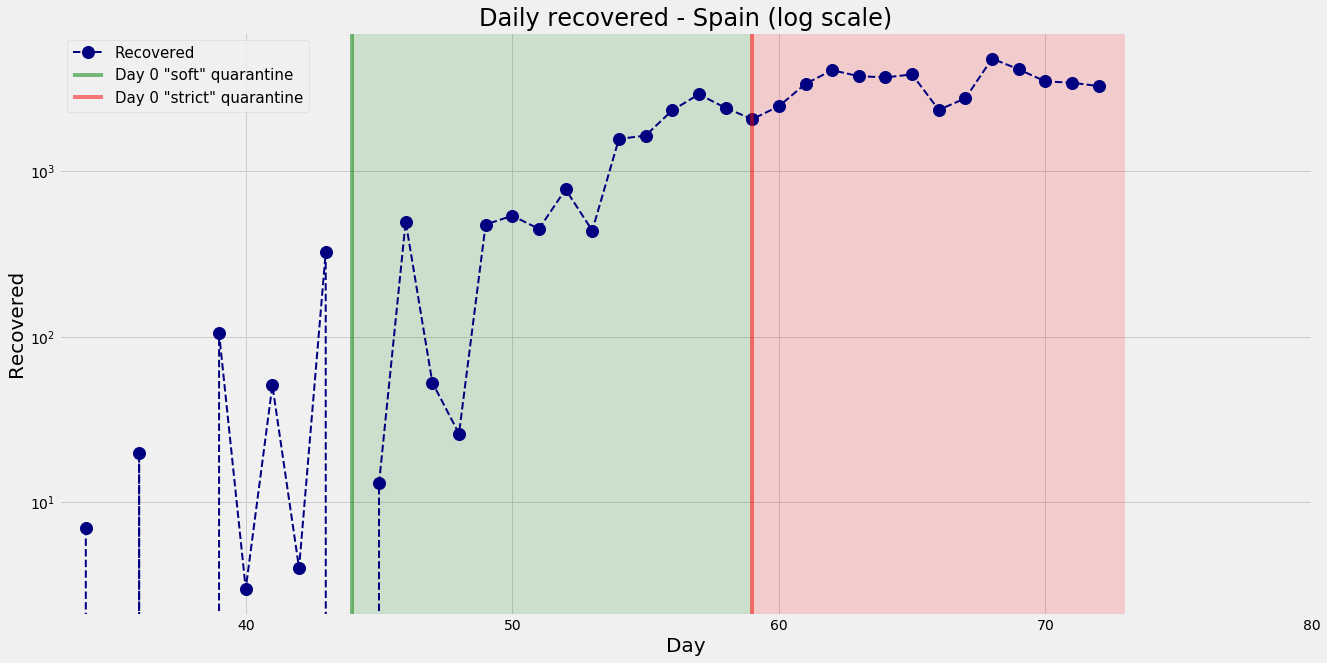

In [17]:
createSinglePlot('Day', 'Recovered_Spain','Recovered','Daily recovered - Spain', 'Recovered','linear')
createSinglePlot('Day', 'Recovered_Spain','Recovered','Daily recovered - Spain (log scale)', 'Recovered','log')

#### Accumulated daily recovered

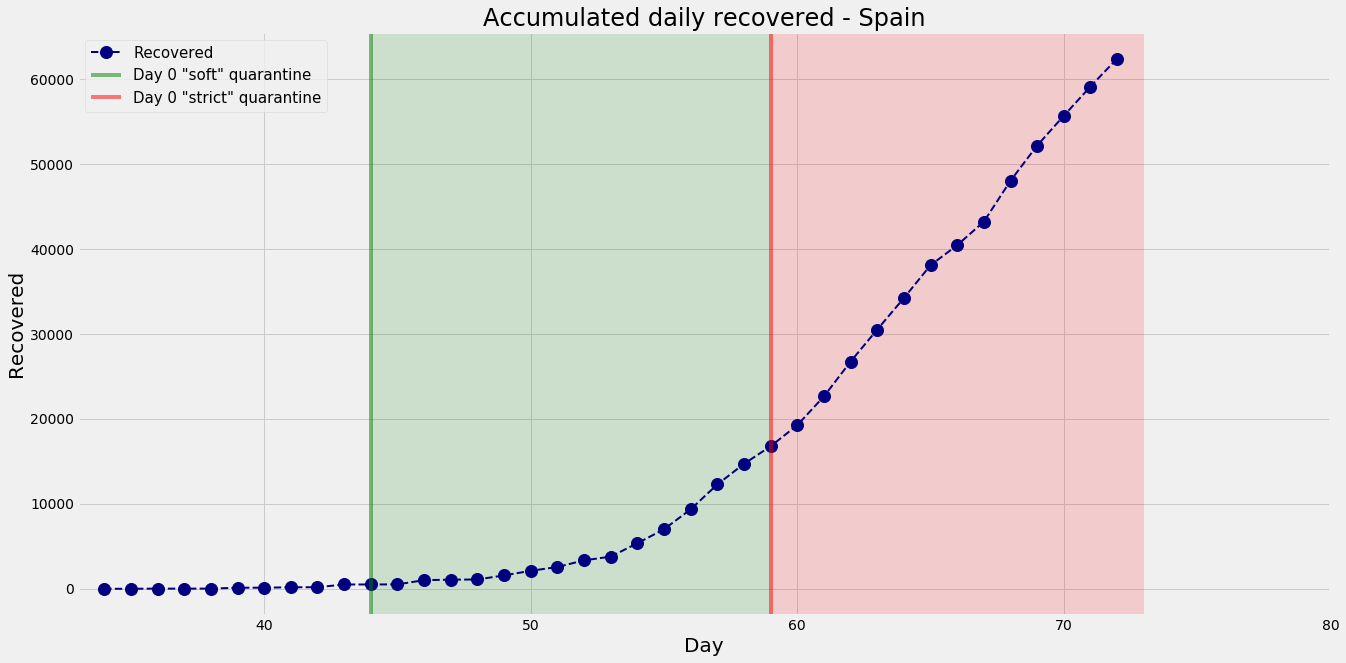

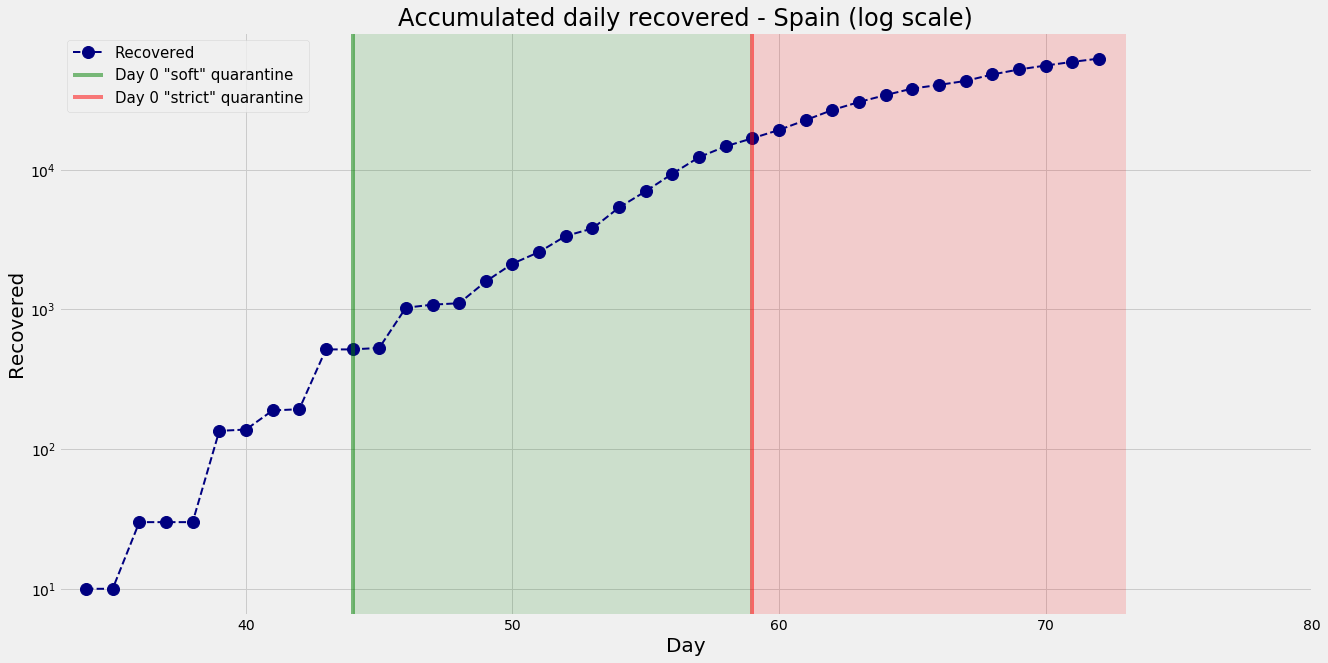

In [18]:
createSinglePlot('Day', 'RecoveredAccum_Spain','Recovered','Accumulated daily recovered - Spain', 'Recovered','linear')
createSinglePlot('Day', 'RecoveredAccum_Spain','Recovered','Accumulated daily recovered - Spain (log scale)', 'Recovered','log')

#### Variation rate

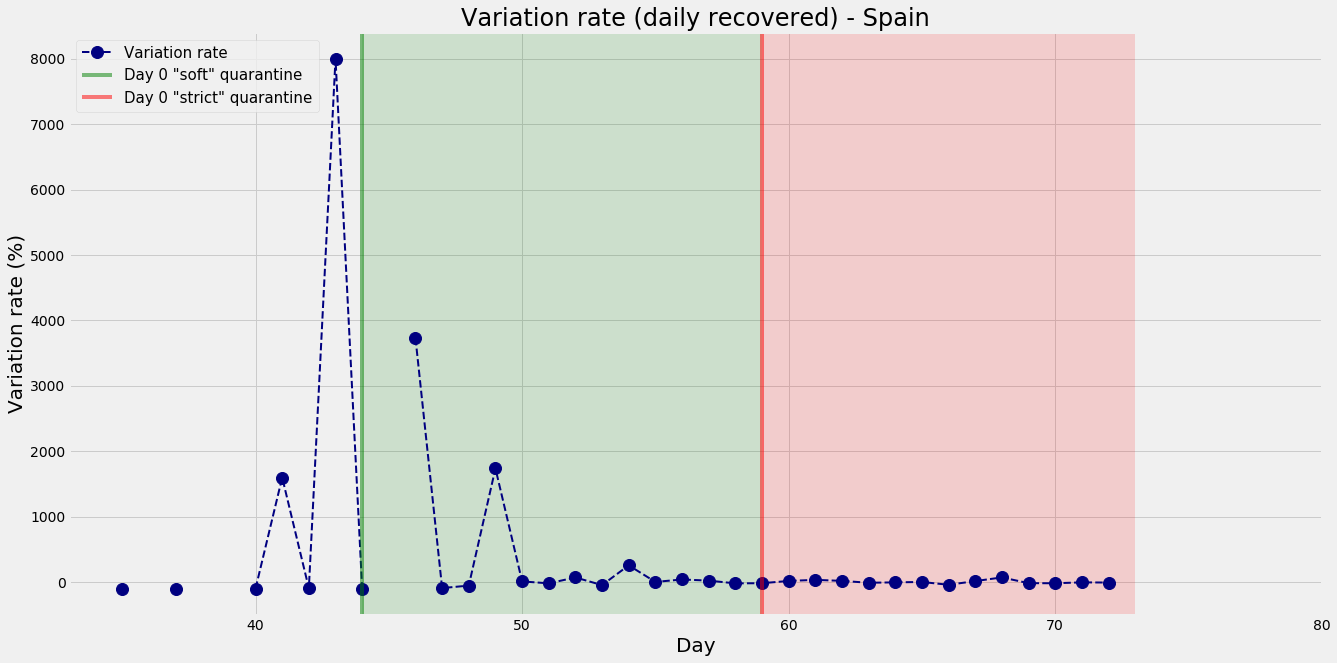

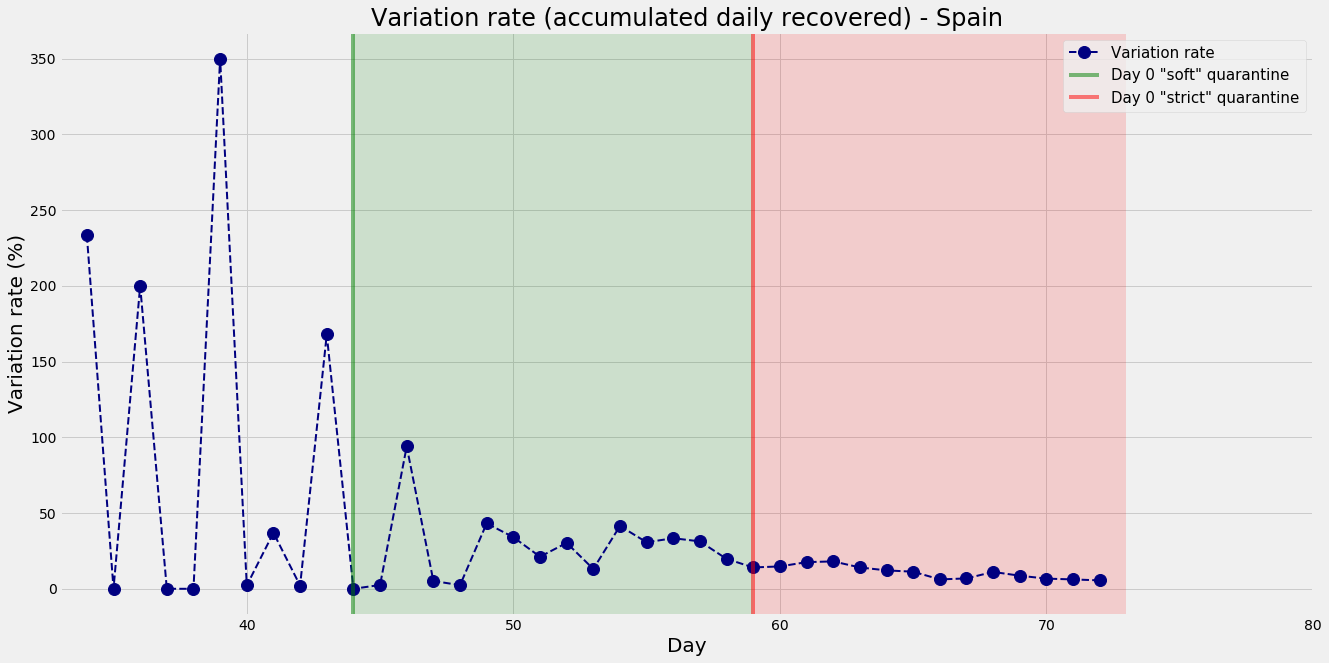

In [19]:
createSinglePlot('Day', 'Recovered_VariationRate_Spain','Variation rate','Variation rate (daily recovered) - Spain', 'Variation rate (%)','linear')
createSinglePlot('Day', 'RecoveredAccum_VariationRate_Spain','Variation rate','Variation rate (accumulated daily recovered) - Spain', 'Variation rate (%)','linear')

## MADRID

### Cases

#### Daily cases

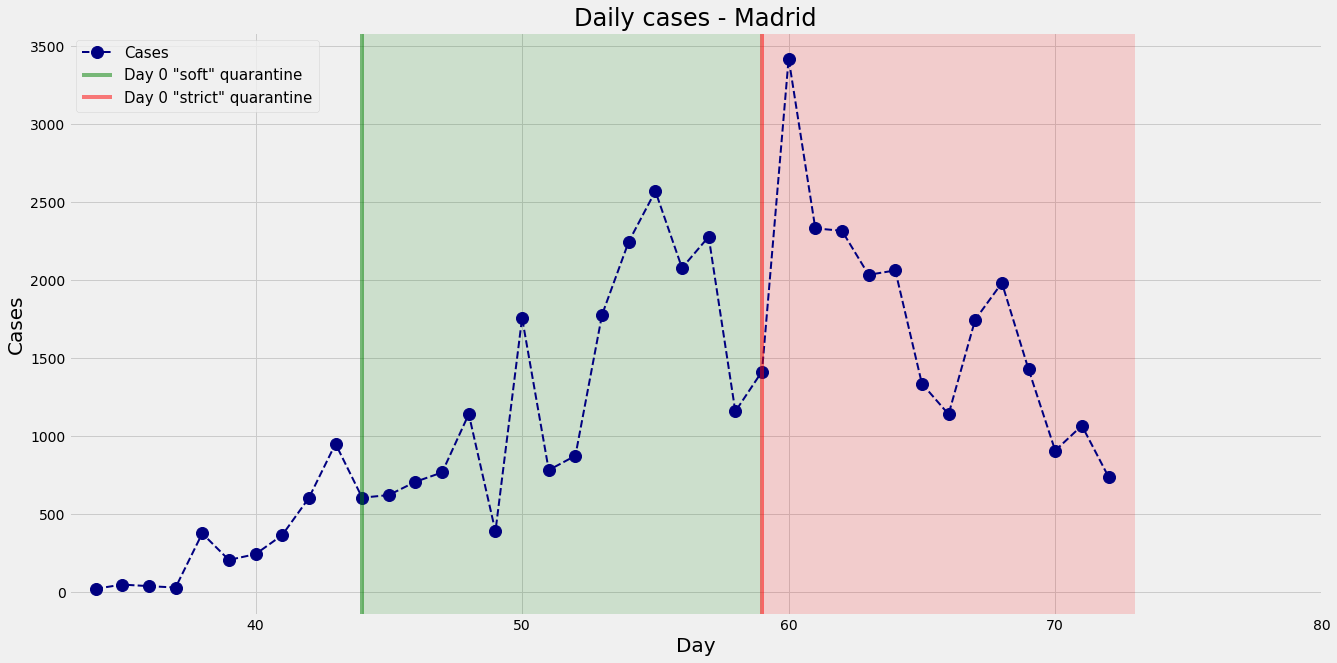

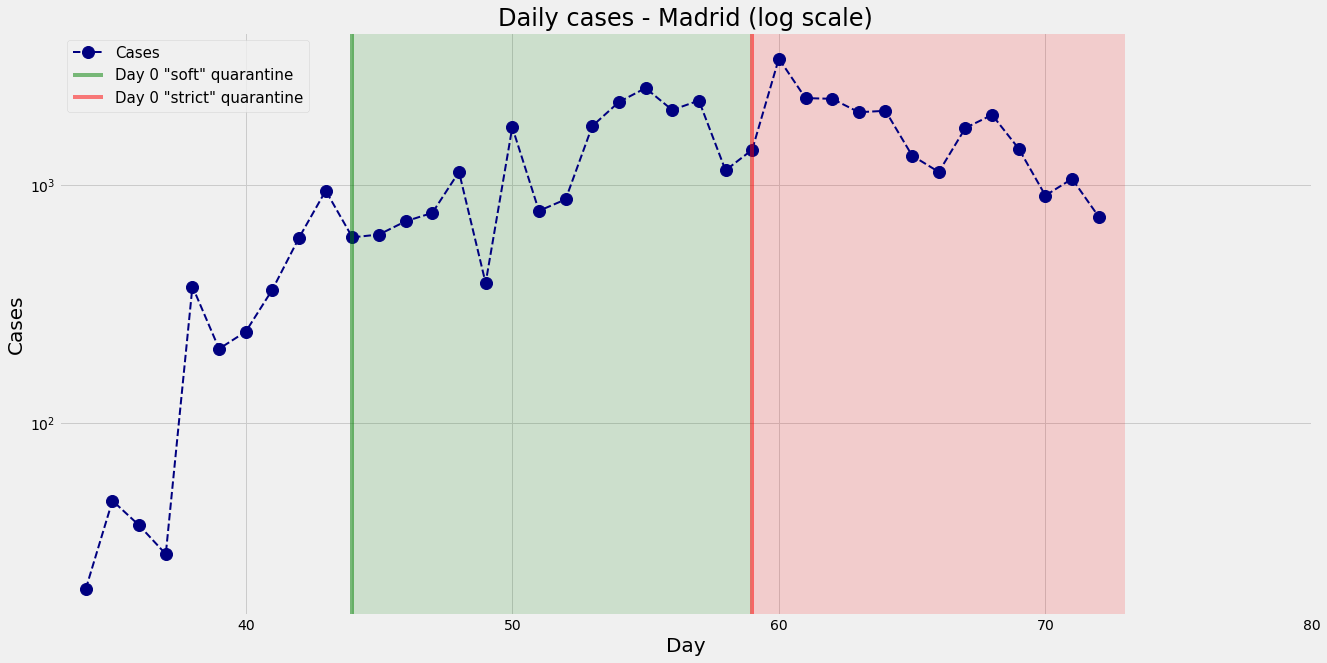

In [20]:
createSinglePlot('Day', 'Cases_Madrid','Cases','Daily cases - Madrid', 'Cases','linear')
createSinglePlot('Day', 'Cases_Madrid','Cases','Daily cases - Madrid (log scale)', 'Cases','log')

#### Accumulated daily cases

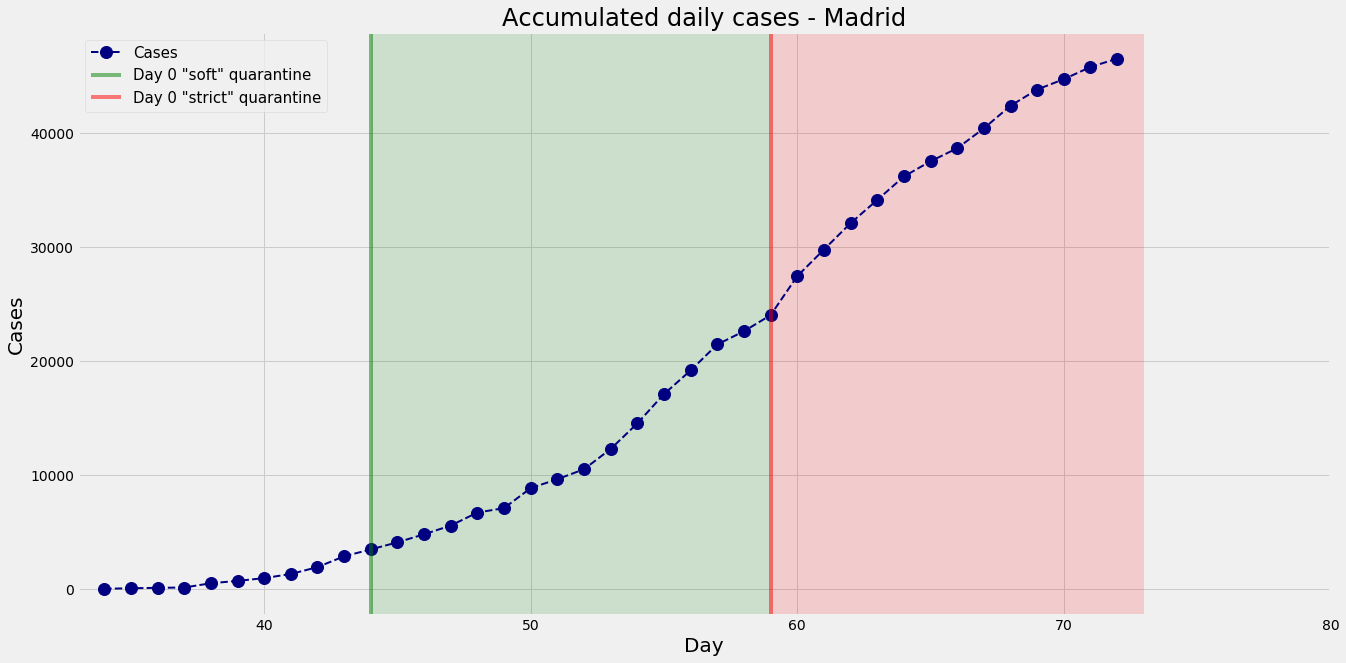

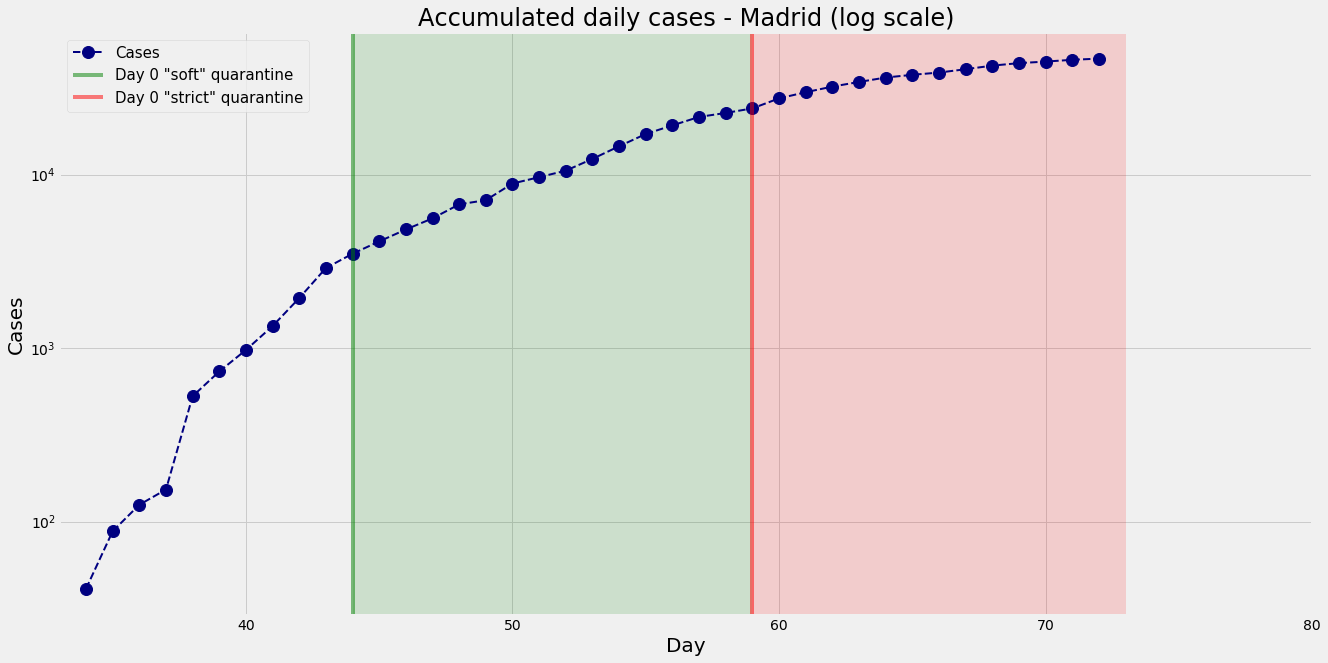

In [21]:
createSinglePlot('Day', 'CasesAccum_Madrid','Cases','Accumulated daily cases - Madrid', 'Cases','linear')
createSinglePlot('Day', 'CasesAccum_Madrid','Cases','Accumulated daily cases - Madrid (log scale)', 'Cases','log')

#### Variation rate

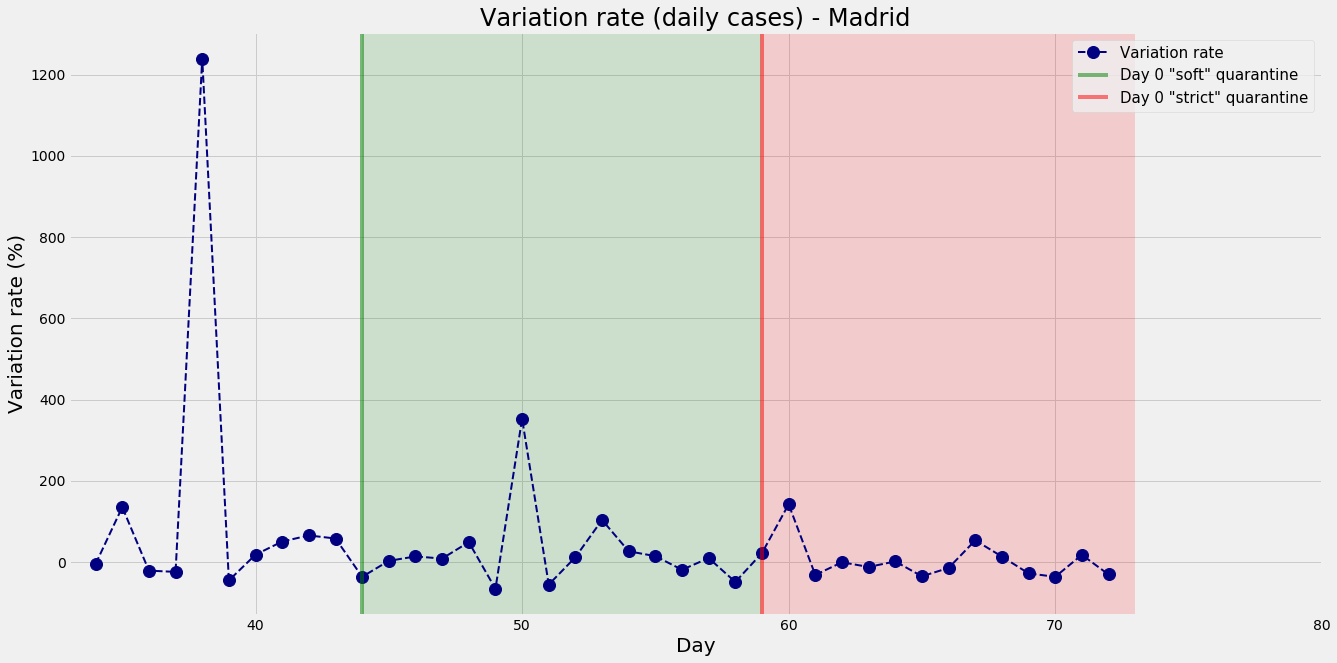

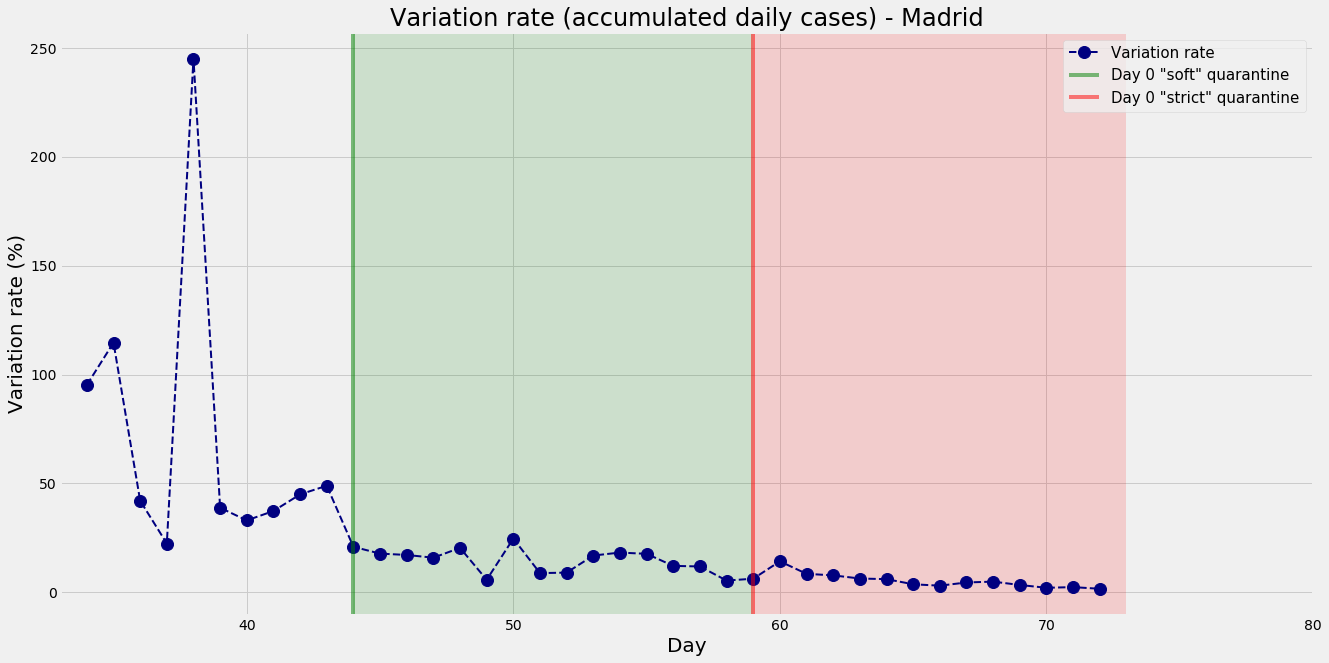

In [22]:
createSinglePlot('Day', 'Cases_VariationRate_Madrid','Variation rate','Variation rate (daily cases) - Madrid', 'Variation rate (%)','linear')
createSinglePlot('Day', 'CasesAccum_VariationRate_Madrid','Variation rate','Variation rate (accumulated daily cases) - Madrid', 'Variation rate (%)','linear')

### Deaths

#### New deaths

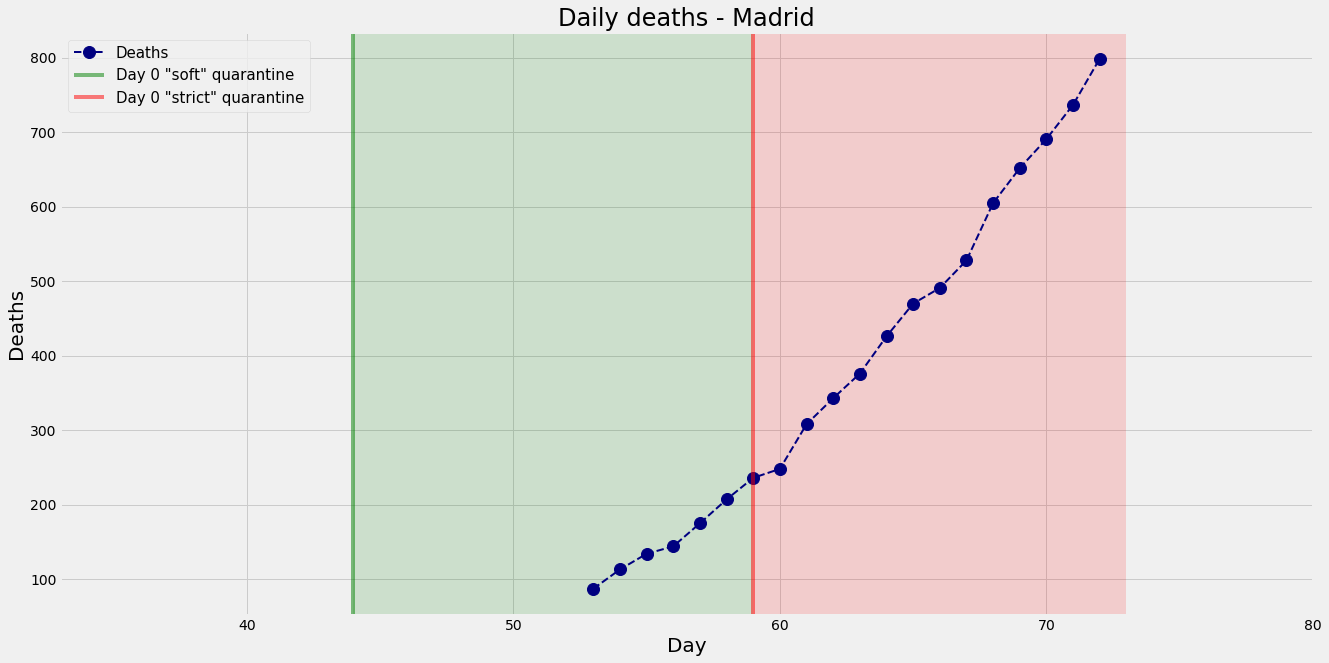

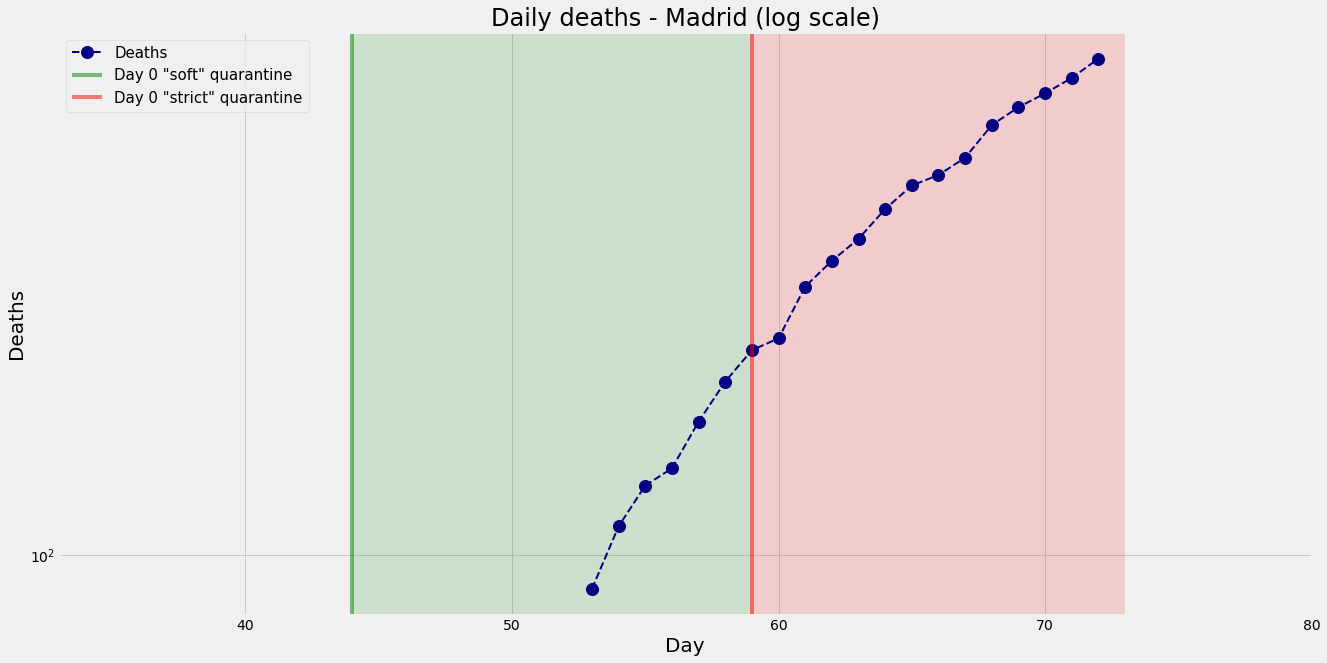

In [23]:
createSinglePlot('Day', 'Deaths_Madrid','Deaths','Daily deaths - Madrid', 'Deaths','linear')
createSinglePlot('Day', 'Deaths_Madrid','Deaths','Daily deaths - Madrid (log scale)', 'Deaths','log')

#### Accumulated daily deaths

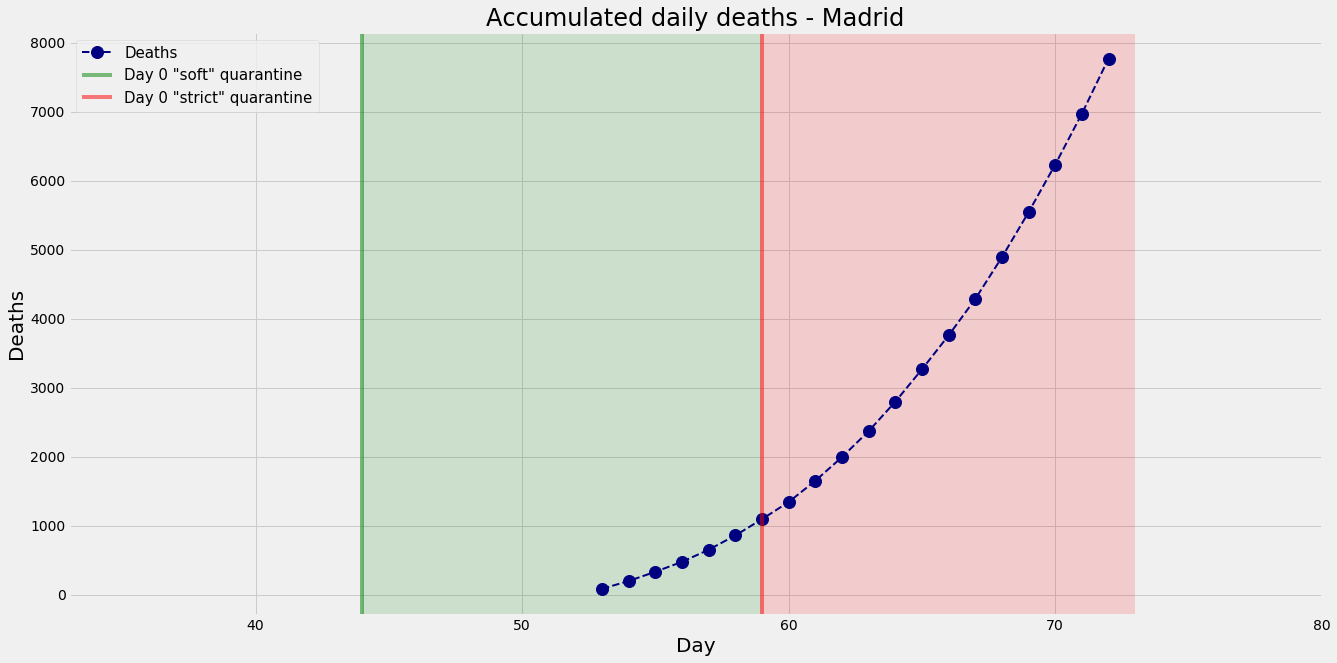

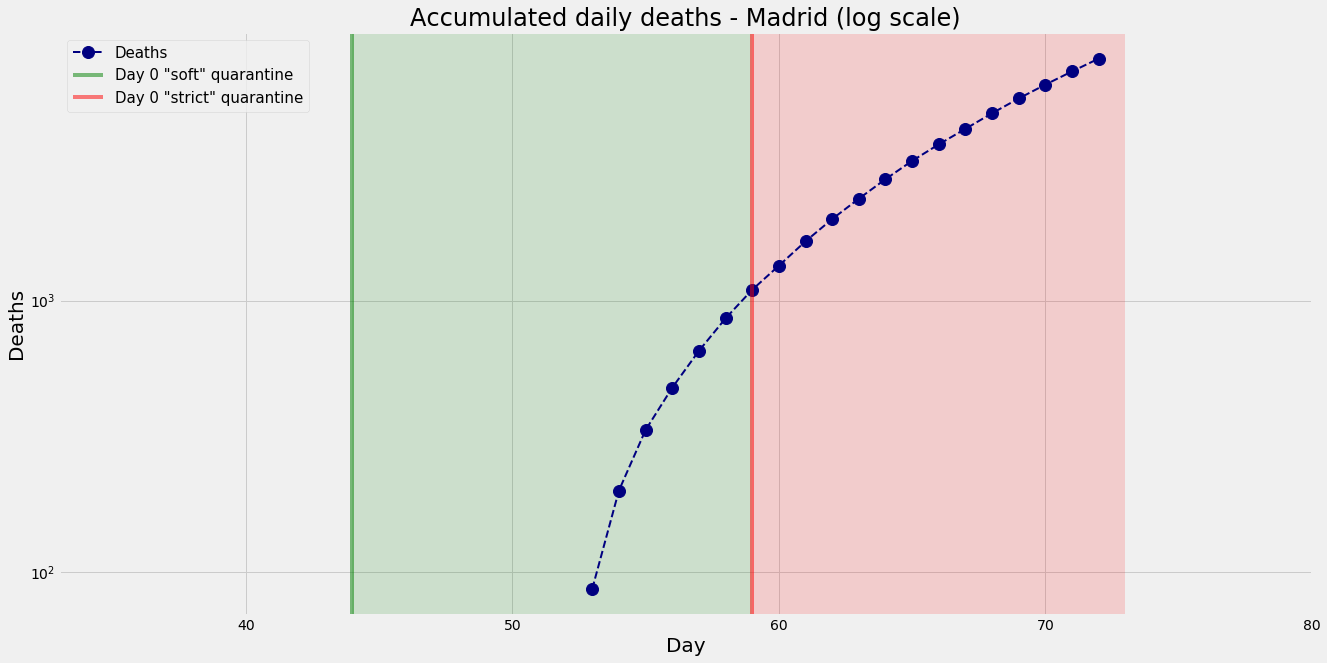

In [24]:
createSinglePlot('Day', 'DeathsAccum_Madrid','Deaths','Accumulated daily deaths - Madrid', 'Deaths','linear')
createSinglePlot('Day', 'DeathsAccum_Madrid','Deaths','Accumulated daily deaths - Madrid (log scale)', 'Deaths','log')

#### Variation rate

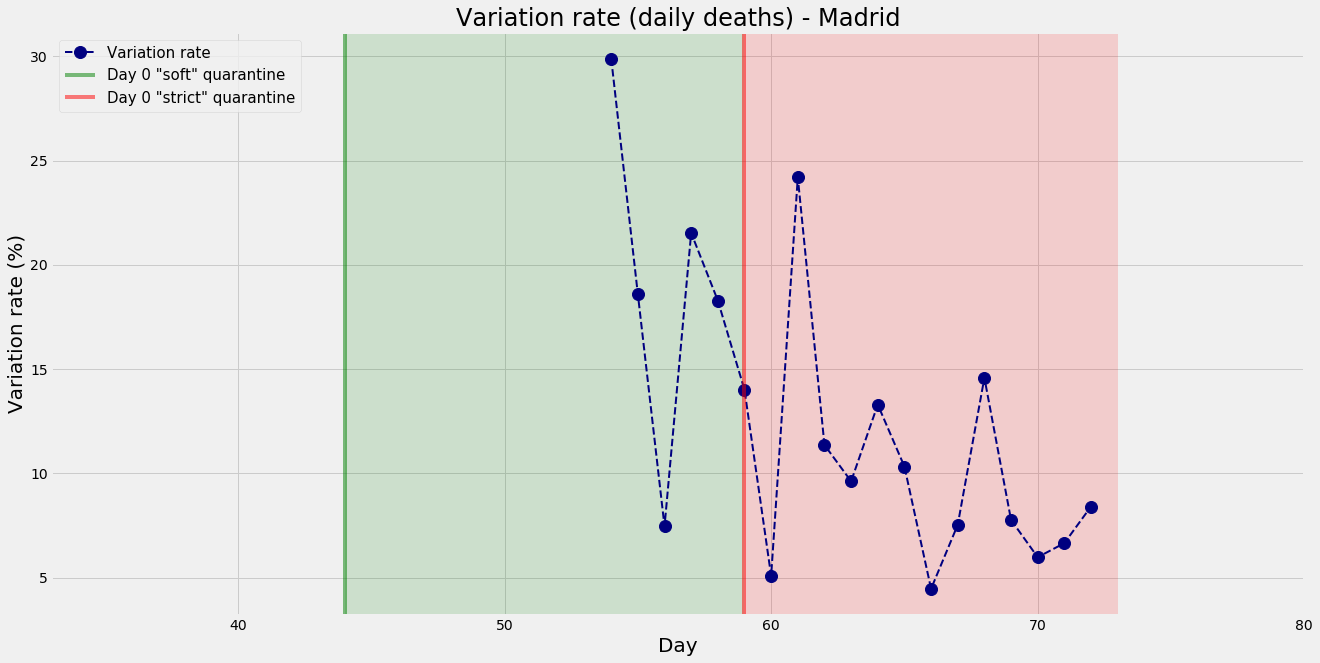

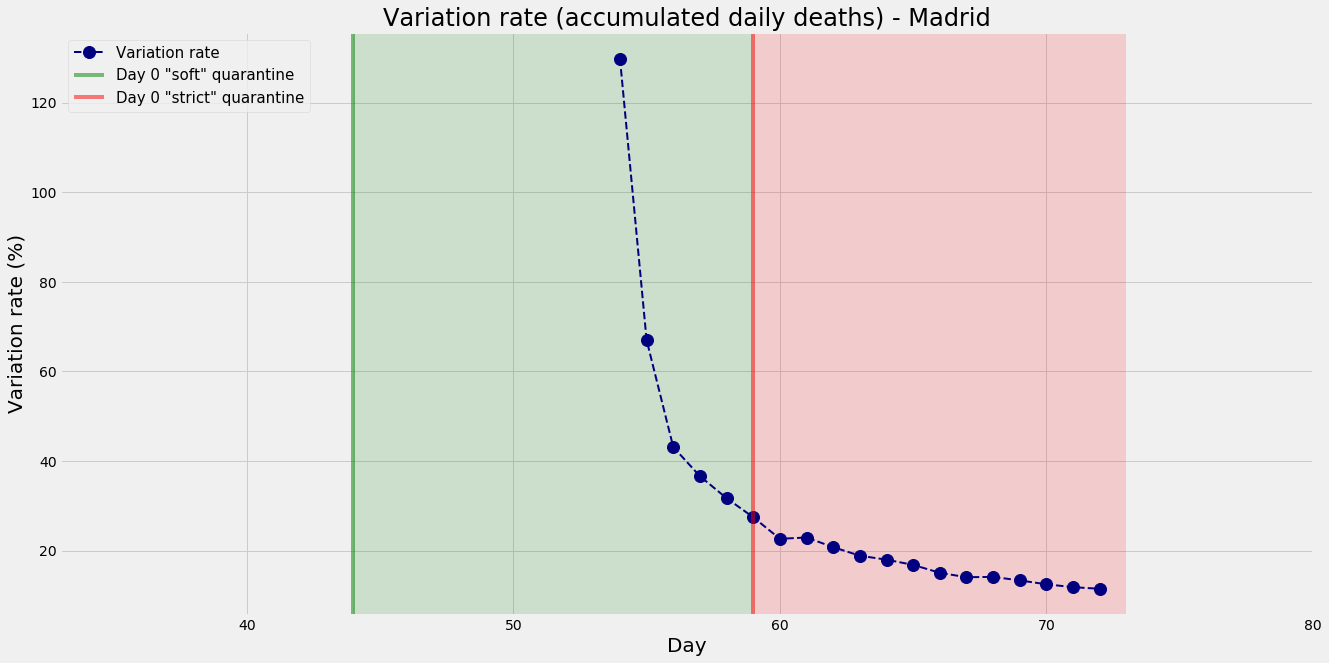

In [25]:
createSinglePlot('Day', 'Deaths_VariationRate_Madrid','Variation rate','Variation rate (daily deaths) - Madrid', 'Variation rate (%)','linear')
createSinglePlot('Day', 'DeathsAccum_VariationRate_Madrid','Variation rate','Variation rate (accumulated daily deaths) - Madrid', 'Variation rate (%)','linear')